# Project Title: **Amazon Product Review Analysis**


# Data Set     :      **Digital Music**

# **Problem statement**

* **This is the Problem Statement given by Amazon to classify the customer comments. This would be helpful for the organization to understand Customer feedback.**

# Introduction:

* **On the digital medium we swipe across hundreds of product choices under one category. It will be tedious for the customer to make selection.** 

* **Here comes 'reviews' where customers who have already got that product leave a rating after using them and brief their experience by giving reviews.** 

* **A sentiment analysis on the product reviews provided by the customers using NLP and  also identifying aspects of the products from the Amazon reviews.** 

* **Amazon review data analysis can give insightful customer information that can be harnessed for product betterment.**

# Objectives:

* **Sentiment analysis to extract the emotions expressed by customers for product reviews.**

* **Exploratory data analysis to understand the underlying patterns, trends and relationships in the data.**

* **We will perform text classification model to predict the customer sentiments.**

* **Clustering to group similar data points together based on their inherent patterns.**

* **Time series model to forecast customers sentiments in future based on historical data.**

# Data description:

### Amazon product data
* **Dataset contains product reviews from Amazon**

* **From May 1996 to July 2014**

### Category:
* **Digital Music: (100000 observations)**

# Data dictionary:

* **Features:	    Description**

* **reviewerID:	    ID of the reviewer**

* **asin:	        ID of the product**

* **reviewerName:   Name of the reviewer**

* **reviewText:	    Text of the review**

* **overall:	    Rating of the product**

* **Summary:	    Summary of the review**

* **reviewTime:	    Time of the review**

# **Import all required libraries**

In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 
import json



#NLTK libraries
import nltk
import re
import string
nltk.download('all') 
from nltk.corpus import stopwords
from nltk import tokenize
# from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Prashant\AppData\Roaming\nltk_data...
[n


# **Importing the dataset**

**Digital music rating dataset**

In [2]:
music_rating= pd.read_csv('Digital_Music.csv',nrows=100000)
music_rating.columns=(['asin','reviewerID','rating','unixReviewTime'])
music_rating.head()

asin      reviewerID  rating  unixReviewTime
0  0001388703   AC2PL52NKPL29     5.0      1378857600
1  0001388703  A1SUZXBDZSDQ3A     5.0      1362182400
2  0001388703  A3A0W7FZXM0IZW     5.0      1354406400
3  0001388703  A12R54MKO17TW0     5.0      1325894400
4  0001388703  A25ZT87OMIPLNX     5.0      1247011200

**Digital music meta dataset**

In [3]:
meta_music= pd.read_json('meta_Digital_Music.json',nrows=100000,lines=True)
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(meta_music.shape))
print (meta_music.info())

The shape of the  data is (row, column):(74347, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74347 entries, 0 to 74346
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         74347 non-null  object
 1   tech1            74347 non-null  object
 2   description      74347 non-null  object
 3   fit              74347 non-null  object
 4   title            74347 non-null  object
 5   also_buy         74347 non-null  object
 6   tech2            74347 non-null  object
 7   brand            74347 non-null  object
 8   feature          74347 non-null  object
 9   rank             74347 non-null  object
 10  also_view        74347 non-null  object
 11  main_cat         74347 non-null  object
 12  similar_item     74347 non-null  object
 13  date             74347 non-null  object
 14  price            74347 non-null  object
 15  asin             74347 non-null  object
 16  imageURL         74347 n

**Digital music review dataset**

In [4]:
music_core= pd.read_json('Digital_Music_5.json',nrows=100000,lines=True)
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(music_core.shape))
print (music_core.info())

The shape of the  data is (row, column):(100000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         100000 non-null  int64  
 1   vote            5103 non-null    float64
 2   verified        100000 non-null  bool   
 3   reviewTime      100000 non-null  object 
 4   reviewerID      100000 non-null  object 
 5   asin            100000 non-null  object 
 6   style           92415 non-null   object 
 7   reviewerName    99996 non-null   object 
 8   reviewText      99950 non-null   object 
 9   summary         99981 non-null   object 
 10  unixReviewTime  100000 non-null  int64  
 11  image           63 non-null      object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 8.5+ MB
None



# **Data pre-processing and cleaning**

**First of all we will clean and preprocessed data for both the products in order to make it suitable for further analysis**


### Check for null values

In [5]:
#Creating a copy
music_reviews=music_core.copy()

#Checking for null values
music_reviews.isnull().sum()

overall               0
vote              94897
verified              0
reviewTime            0
reviewerID            0
asin                  0
style              7585
reviewerName          4
reviewText           50
summary              19
unixReviewTime        0
image             99937
dtype: int64

### Observation:

**We got null values in reviewer names and review text. Reviewer names doesn’t add any value(we got id’s instead) to our objective of the project. So let’s focus on review text. I don’t think dropping wouldn’t be a problem as there are only 158 null values, but instead I’m thinking to impute that as missing and explore why they didn’t leave any review . Could it be due to ratings?There are huge null values in vote,style,image so, better to drop those columns because these columns doesn't help us to build the model.**


### Drop null values

In [6]:
#Dropping null values
music_reviews.drop(columns=['vote','style','image','reviewerName','unixReviewTime'],inplace=True)

### Fill null values

In [7]:
#Filling NaN with 'missing'
music_reviews['reviewText']=music_reviews['reviewText'].fillna('Missing')
music_reviews['summary']=music_reviews['summary'].fillna('Missing')


### Concatenate review text and summary.

In [8]:
music_reviews['reviews']=music_reviews['reviewText']+music_reviews['summary']
music_reviews=music_reviews.drop(['reviewText', 'summary'], axis=1)
music_reviews.head()

overall  verified   reviewTime      reviewerID        asin  \
0        5      True   06 3, 2013  A2TYZ821XXK2YZ  3426958910   
1        5      True  10 11, 2014  A3OFSREZADFUDY  3426958910   
2        5      True  02 11, 2014  A2VAMODP8M77NG  3426958910   
3        4     False   12 7, 2013   AAKSLZ9IDTEH0  3426958910   
4        5      True  06 12, 2016  A3OH43OZJLKI09  5557706259   

                                             reviews  
0  This is awesome to listen to, A must-have for ...  
1                                     bienFive Stars  
2  It was great to hear the old stuff again and I...  
3  well best of's are a bit poison normally but t...  
4  What can I say? This is Casting Crowns!!!This ...

In [9]:
#Figuring out the distribution of categories
music_reviews['overall'].value_counts().sort_index()

1     1383
2     1058
3     3957
4    14020
5    79582
Name: overall, dtype: int64

### Data Cleaning with regex

In [12]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [13]:
music_reviews['reviews']=music_reviews['reviews'].apply(lambda x:review_cleaning(x))
music_reviews.head()

overall  verified   reviewTime      reviewerID        asin  \
0        5      True   06 3, 2013  A2TYZ821XXK2YZ  3426958910   
1        5      True  10 11, 2014  A3OFSREZADFUDY  3426958910   
2        5      True  02 11, 2014  A2VAMODP8M77NG  3426958910   
3        4     False   12 7, 2013   AAKSLZ9IDTEH0  3426958910   
4        5      True  06 12, 2016  A3OH43OZJLKI09  5557706259   

                                             reviews  
0  this is awesome to listen to a musthave for al...  
1                                     bienfive stars  
2  it was great to hear the old stuff again and i...  
3  well best ofs are a bit poison normally but th...  
4  what can i say this is casting crownsthis is a...

### **Remove Stop words:**

**Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have created the stop words which doesn't have any negative sentiment or any negative alternatives.**

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

music_reviews['reviews'] = music_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))



### **Lemmatization**

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
music_reviews['reviews']=music_reviews['reviews'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [16]:
music_reviews.head()

overall  verified   reviewTime      reviewerID        asin  \
0        5      True   06 3, 2013  A2TYZ821XXK2YZ  3426958910   
1        5      True  10 11, 2014  A3OFSREZADFUDY  3426958910   
2        5      True  02 11, 2014  A2VAMODP8M77NG  3426958910   
3        4     False   12 7, 2013   AAKSLZ9IDTEH0  3426958910   
4        5      True  06 12, 2016  A3OH43OZJLKI09  5557706259   

                                             reviews  
0  awesome listen musthave slayer fanssadly neede...  
1                                      bienfive star  
2  great hear old stuff like new stuff recommend ...  
3  well best ofs bit poison normally bad pretty g...  
4  say casting crownsthis good blessing filled cd...

# Sentiment Analysis

**We will perform Sentiment analysis to extract the emotions expressed by customers for product reviews**

In [17]:
!pip install textblob

In [19]:
# Sentiment analysis 

from textblob import TextBlob

def TextBlob_sentimental(data):
    return TextBlob(data).sentiment.polarity

music_reviews['polarity_score'] = music_reviews.reviews.apply(lambda x: TextBlob_sentimental(''.join(x)))


### **Creating ‘sentiment’ column**

**This is an important pre-processing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 0, we take that as positive and if the value is less than 0 it is negative If it is equal to 0, we take that as neutral sentiment.**

In [20]:
from textblob.en import positive
def TextBlob_sentimental_score(data):
   
    score = TextBlob(data).sentiment.polarity
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'
    

In [21]:
music_reviews['sentiment_score'] = music_reviews['reviews'].apply(lambda x: TextBlob_sentimental_score(x))


In [22]:
pos_textblob = music_reviews.loc[music_reviews['sentiment_score'] == 'positive']
neg_textblob = music_reviews.loc[music_reviews['sentiment_score'] == 'Negative']

In [23]:
print("Positive reviews: ", len(pos_textblob))
print("Negative reviews: ", len(neg_textblob))

Positive reviews:  80786
Negative reviews:  3268


In [24]:
#Checking the count of values
music_reviews['sentiment_score'].value_counts()

positive    80786
Neutral     15946
Negative     3268
Name: sentiment_score, dtype: int64

### **Observations:**
**The target feature is created as sentiment_score.**

In [25]:
music_reviews.head()

overall  verified   reviewTime      reviewerID        asin  \
0        5      True   06 3, 2013  A2TYZ821XXK2YZ  3426958910   
1        5      True  10 11, 2014  A3OFSREZADFUDY  3426958910   
2        5      True  02 11, 2014  A2VAMODP8M77NG  3426958910   
3        4     False   12 7, 2013   AAKSLZ9IDTEH0  3426958910   
4        5      True  06 12, 2016  A3OH43OZJLKI09  5557706259   

                                             reviews  polarity_score  \
0  awesome listen musthave slayer fanssadly neede...        0.750000   
1                                      bienfive star        0.000000   
2  great hear old stuff like new stuff recommend ...        0.345455   
3  well best ofs bit poison normally bad pretty g...        0.241986   
4  say casting crownsthis good blessing filled cd...        0.550000   

  sentiment_score  
0        positive  
1         Neutral  
2        positive  
3        positive  
4        positive

# Exploratory Data Analysis 


**We will perform exploratory data analysis to understand the underlying patterns, trends and relationships in the data**

In [26]:
music_reviews.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviews',
       'polarity_score', 'sentiment_score'],
      dtype='object')

In [27]:
music_reviews['word_count'] = music_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [28]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.0 MB/s eta 0:00:00


In [29]:
from wordcloud import WordCloud

### Wordcloud-Positive reviews

**Let us look at the word cloud of positive reviews**

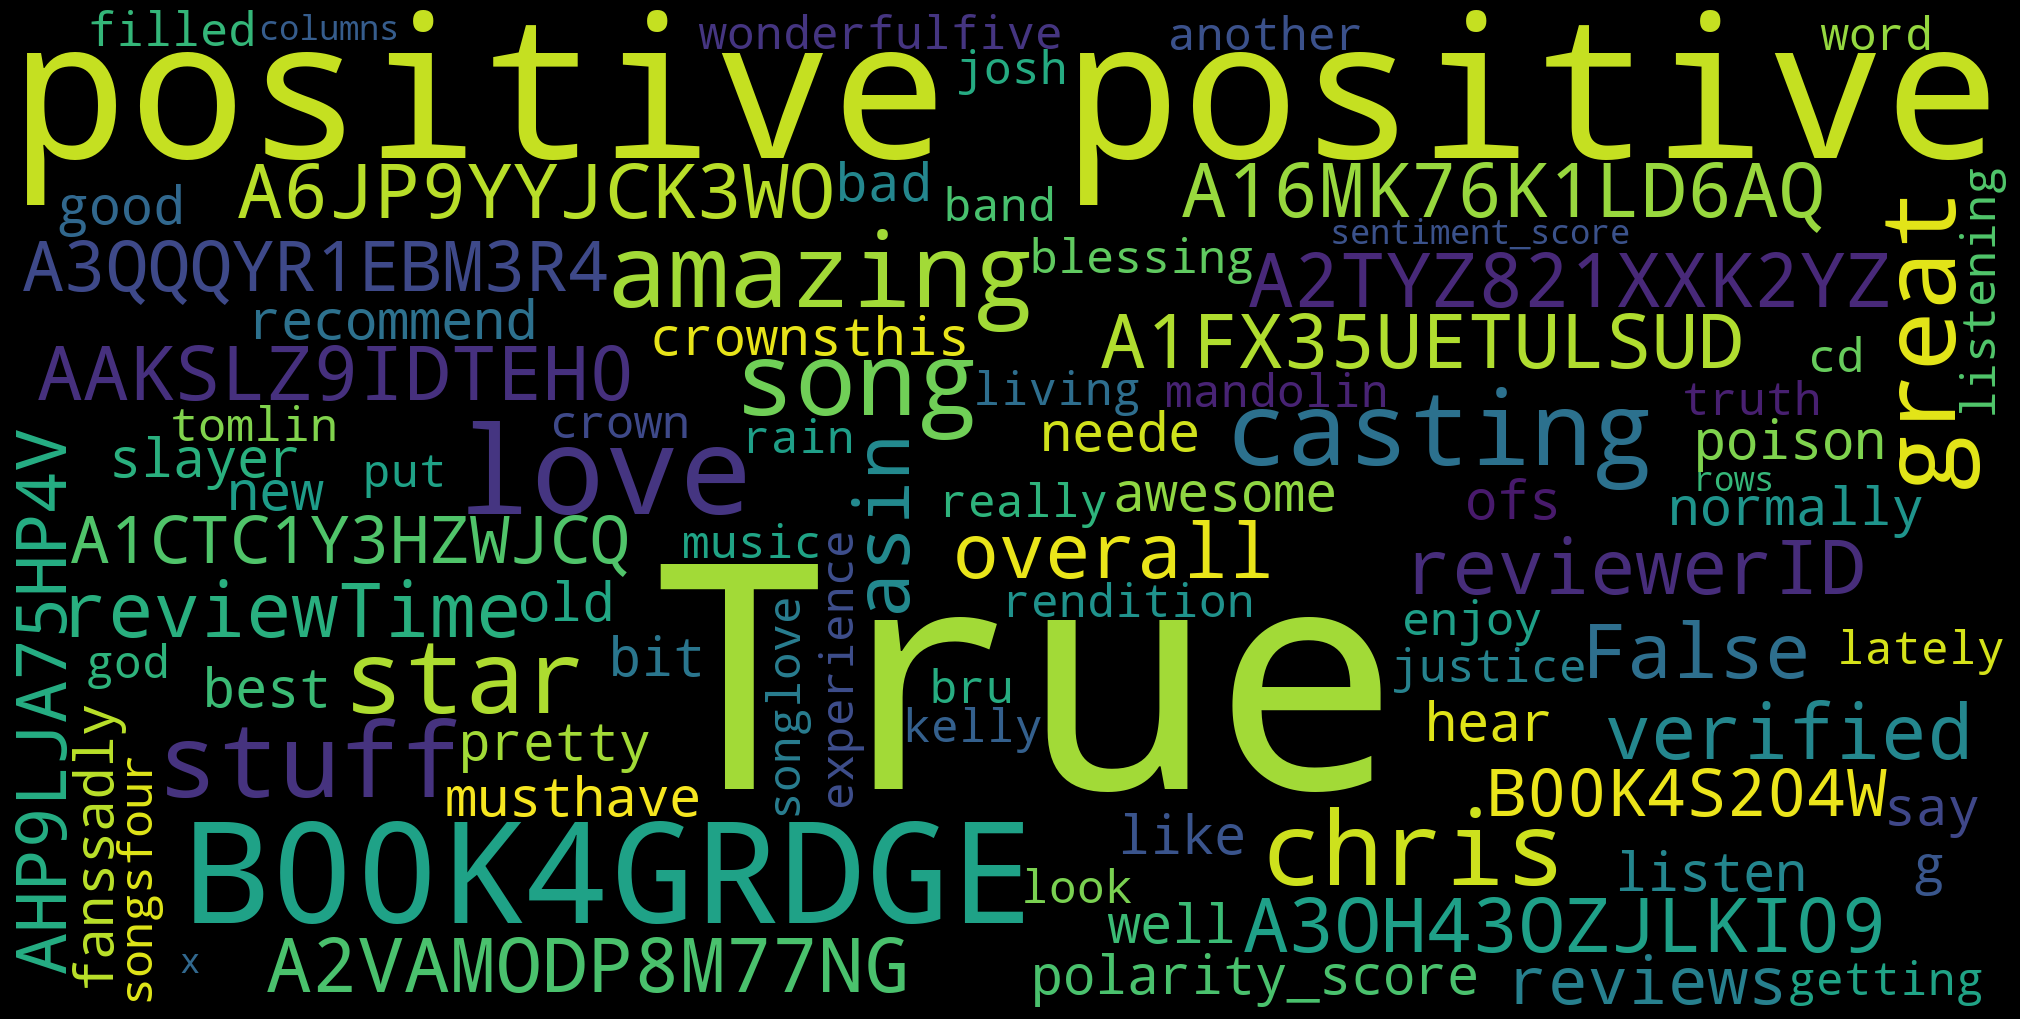

In [30]:
text = pos_textblob
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observation:
    
* **We can see positive words like amazing,awesome,wonderful,great etc**

### Wordcloud-Negative reviews

**Let us look at the word cloud of negative reviews**

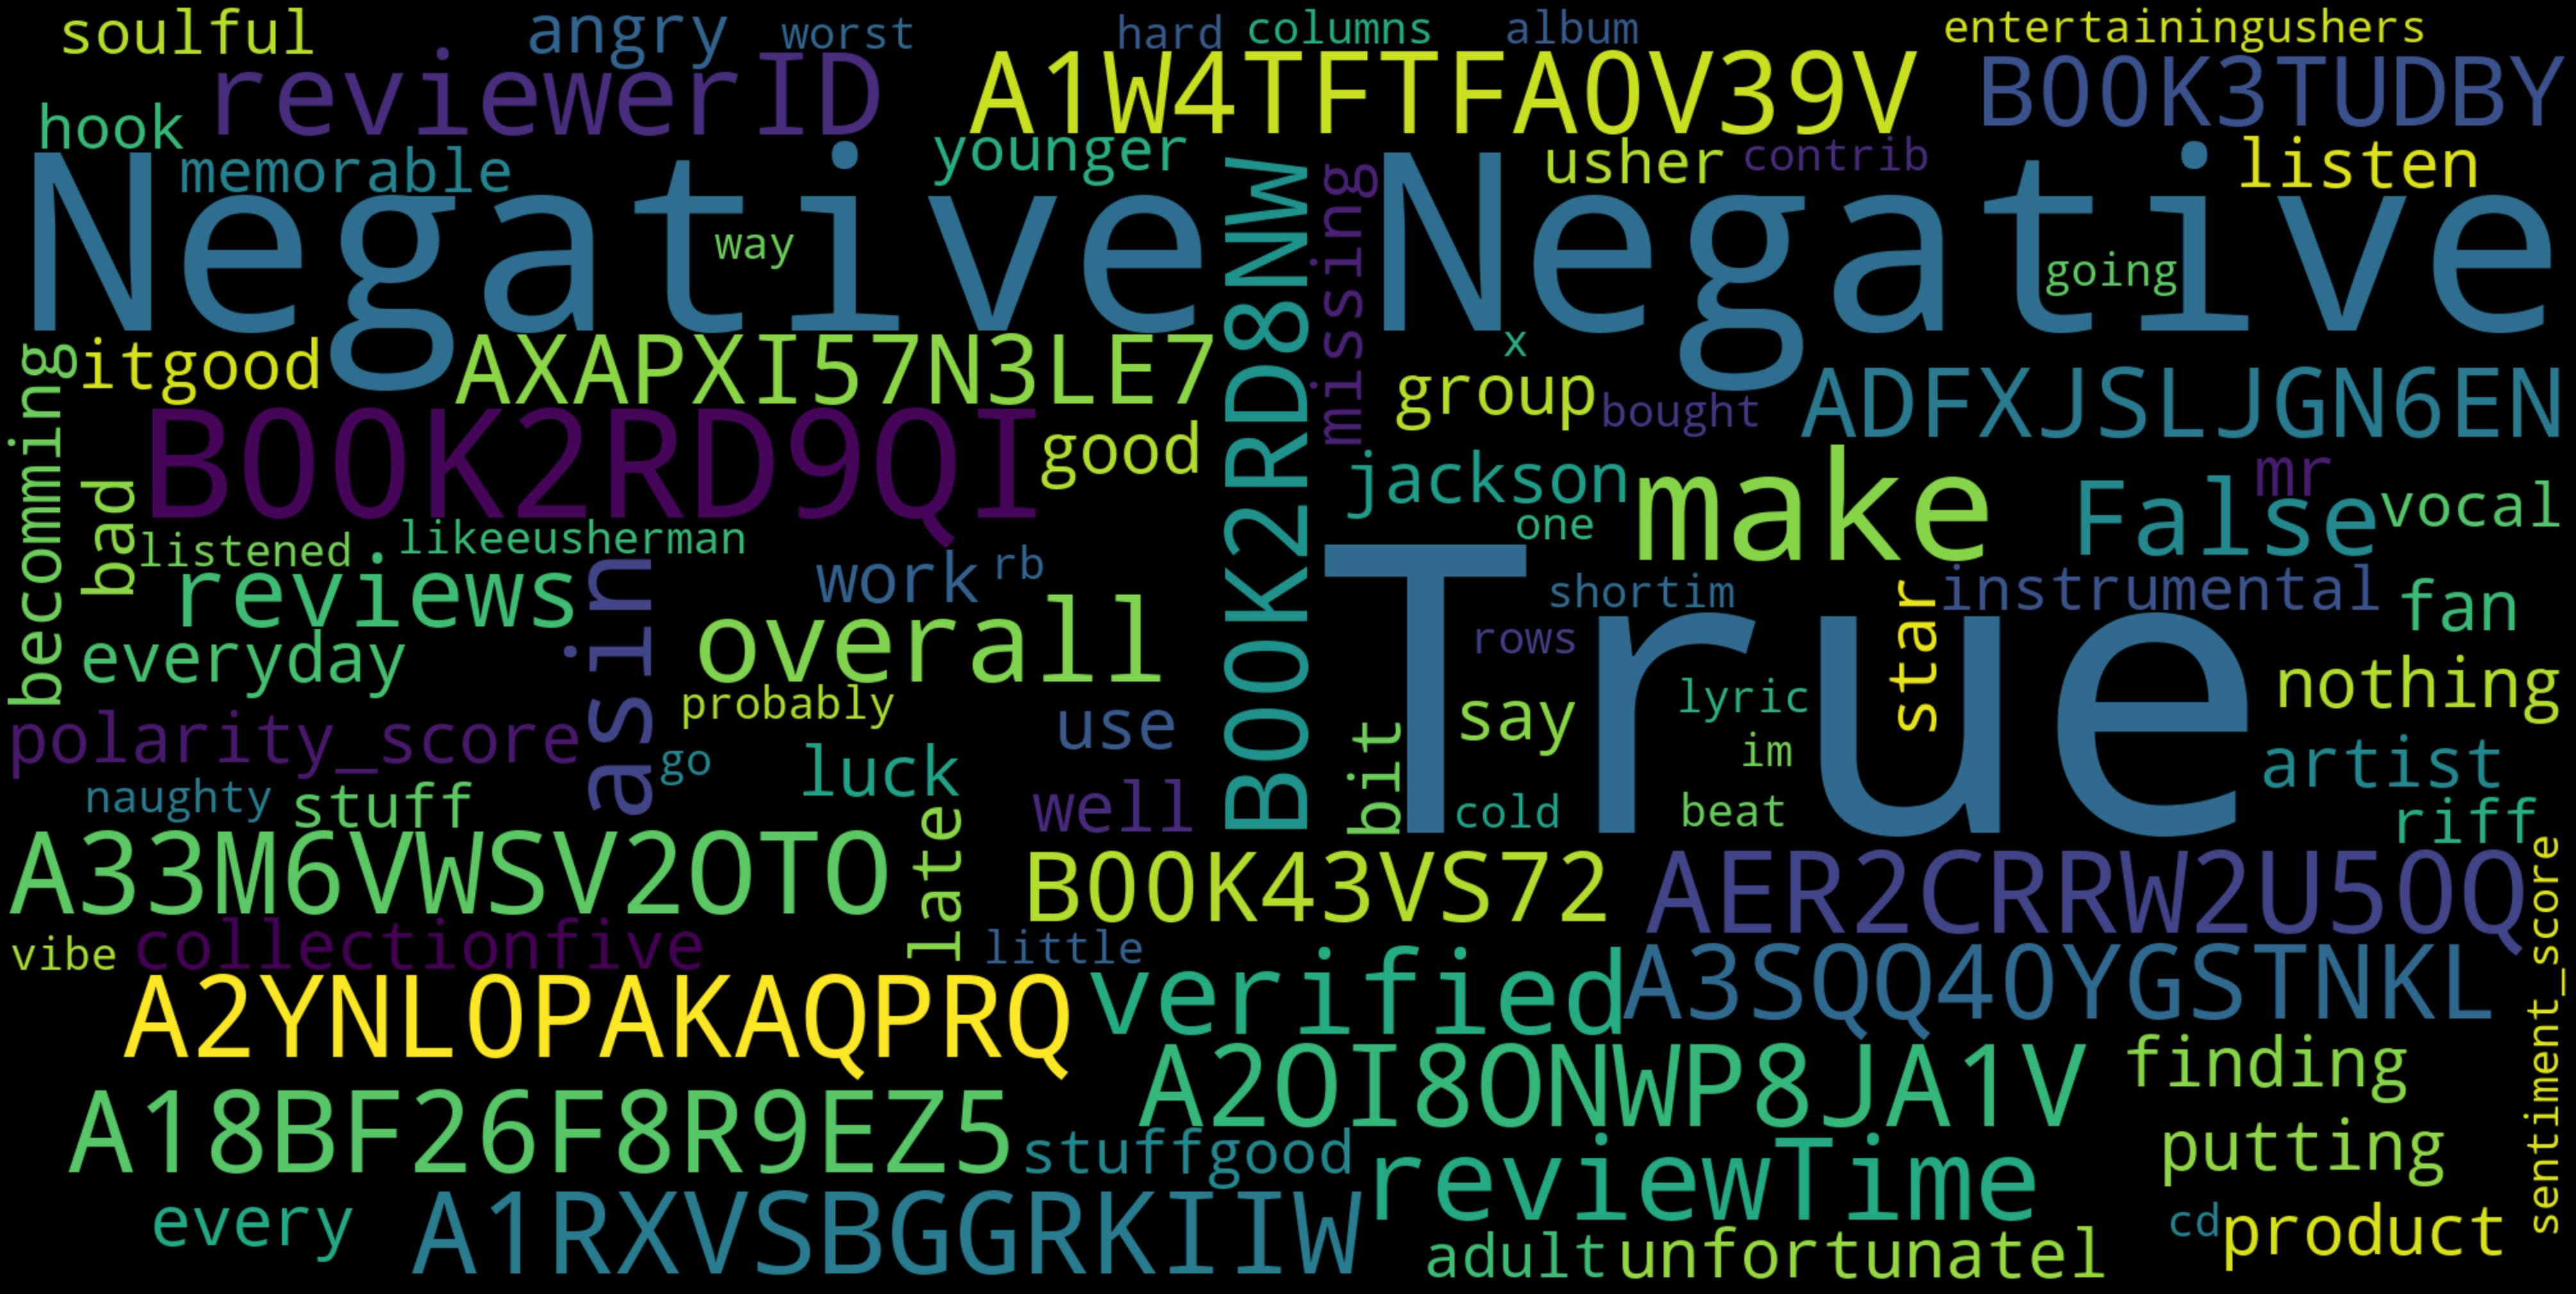

In [34]:
text = neg_textblob
wordcloud = WordCloud(
    width = 2000,
    height =1000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observation:
    
* **We can see negative review words such as bad,angry,late,wasnt,missing,unfortunatel etc.**

In [37]:
negative_reviews=music_reviews[music_reviews['sentiment_score']=='Negative']

In [38]:
from collections import Counter

In [39]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Download the NLTK stopwords corpus
#nltk.download('stopwords')

# Define a function to extract the most repeated words or phrases from a list of texts
def most_common_phrases(texts):
    # Convert the list of texts to lowercase and tokenize them into individual words
    words = [word.lower() for text in texts for word in word_tokenize(text)]
    # Remove stop words from the list of words
    #stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    # Find the most common words using a Counter object
    word_counts = Counter(filtered_words)
    most_common = word_counts.most_common(10)
    # Find the most common bigrams using a BigramCollocationFinder object
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(filtered_words)
    finder.apply_freq_filter(3)
    bigrams = finder.nbest(bigram_measures.raw_freq, 20)
    # Return the most common words and bigrams
    return most_common, bigrams

# Example usage
texts = negative_reviews['reviews']
most_common, bigrams = most_common_phrases(texts)
print("Most common words:", most_common)
print("Most common bigrams:", bigrams)

Most common words: [('song', 3137), ('like', 1136), ('music', 843), ('bad', 638), ('one', 611), ('album', 526), ('time', 417), ('star', 412), ('get', 395), ('never', 331)]
Most common bigrams: [('like', 'song'), ('bad', 'quality'), ('never', 'happens'), ('purchased', 'unless'), ('quality', 'never'), ('unless', 'bad'), ('downloadall', 'single'), ('single', 'tone'), ('song', 'like'), ('love', 'song'), ('one', 'song'), ('song', 'want'), ('give', 'star'), ('purchase', 'amazon'), ('amazon', 'song'), ('happens', 'purchased'), ('cant', 'wrong'), ('star', 'purchased'), ('would', 'ever'), ('ever', 'give')]


<AxesSubplot:>

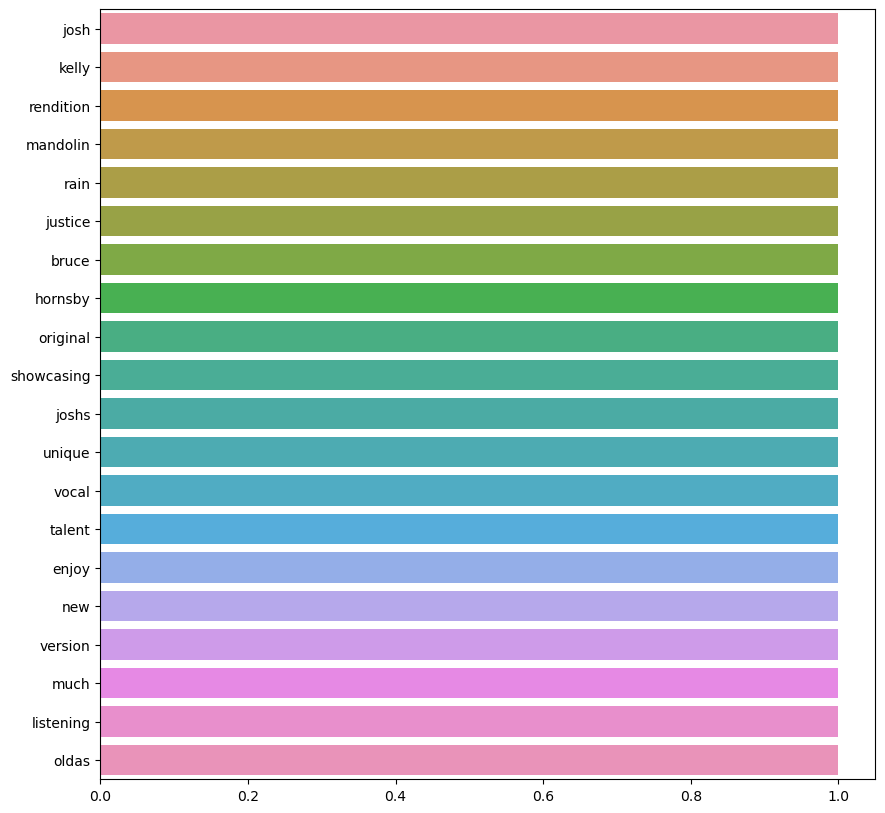

In [40]:
for i in music_reviews['reviews']:
    global text
    text = i.split()
    
counter=Counter(text)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
plt.figure(figsize = (10,10))     
sns.barplot(x=y,y=x)

In [41]:
music_reviews.head()

overall  verified   reviewTime      reviewerID        asin  \
0        5      True   06 3, 2013  A2TYZ821XXK2YZ  3426958910   
1        5      True  10 11, 2014  A3OFSREZADFUDY  3426958910   
2        5      True  02 11, 2014  A2VAMODP8M77NG  3426958910   
3        4     False   12 7, 2013   AAKSLZ9IDTEH0  3426958910   
4        5      True  06 12, 2016  A3OH43OZJLKI09  5557706259   

                                             reviews  polarity_score  \
0  awesome listen musthave slayer fanssadly neede...        0.750000   
1                                      bienfive star        0.000000   
2  great hear old stuff like new stuff recommend ...        0.345455   
3  well best ofs bit poison normally bad pretty g...        0.241986   
4  say casting crownsthis good blessing filled cd...        0.550000   

  sentiment_score  word_count  
0        positive          12  
1         Neutral           2  
2        positive          10  
3        positive          82  
4        positive          10

### EDA on review dataset

In [23]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

### Polarity score vs. count of reviews

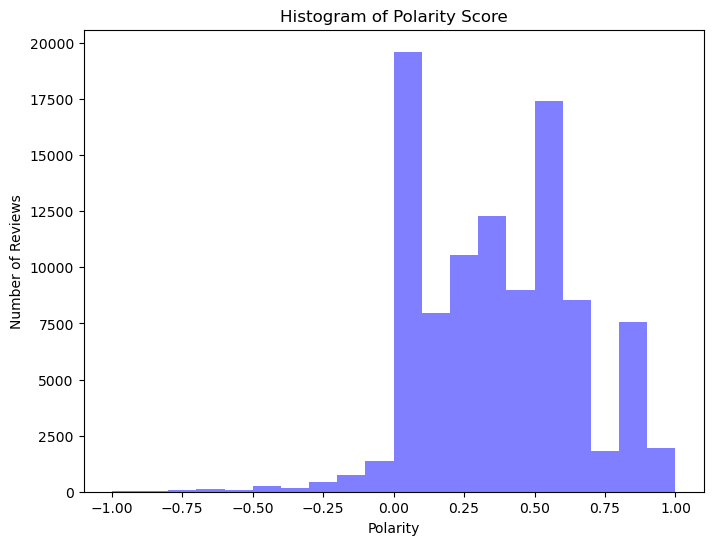

In [24]:
num_bins = 20
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(music_reviews.polarity_score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [25]:
music_reviews.shape

(100000, 8)

### Interpretation:

* **More number of reviews are present with polarity reviews greater than zero.**

### Analyzing percentage of reviews based on Sentiment Analysis

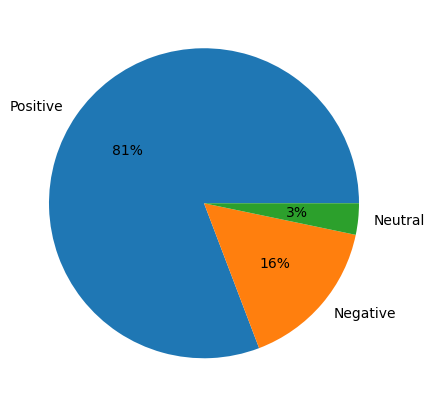

In [26]:
#Visualization of sentiment analysis
plt.figure(figsize=(5,20))
s=music_reviews["sentiment_score"].value_counts()
mylabels = ["Positive", "Negative", "Neutral"]

plt.pie(s, labels = mylabels,autopct='%1.0f%%')
#plt.title('propotion of sentiments',font=15)
plt.show();


### Interpretation:

* **In digital music product majority (81%) of reviews are positive ,16% reviews are negative and 3% reviews are neutral.**


## **Handling time column for EDA**

**Here we have an unusual review time column,we will split the reviewTime column to day, month and year.**

In [27]:
# new data frame which has date and year
new = music_reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
music_reviews["date"]= new[0] 
  
# making separate year column from new data frame 
music_reviews["year"]= new[1] 

#music_reviews=music_reviews.drop(['reviewTime'], axis=1)

# Splitting the date 
new1 = music_reviews["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
music_reviews["month"]= new1[0] 
  
# adding day to the main dataset 
music_reviews["day"]= new1[1] 

music_reviews=music_reviews.drop(['date'], axis=1)
music_reviews.head()

overall  verified   reviewTime      reviewerID        asin  \
0        5      True   06 3, 2013  A2TYZ821XXK2YZ  3426958910   
1        5      True  10 11, 2014  A3OFSREZADFUDY  3426958910   
2        5      True  02 11, 2014  A2VAMODP8M77NG  3426958910   
3        4     False   12 7, 2013   AAKSLZ9IDTEH0  3426958910   
4        5      True  06 12, 2016  A3OH43OZJLKI09  5557706259   

                                             reviews  polarity_score  \
0  awesome listen musthave slayer fanssadly neede...        0.750000   
1                                      bienfive star        0.000000   
2  great hear old stuff like new stuff recommend ...        0.345455   
3  well best ofs bit poison normally bad pretty g...        0.241986   
4  say casting crownsthis good blessing filled cd...        0.550000   

  sentiment_score   year month day  
0        positive   2013    06   3  
1         Neutral   2014    10  11  
2        positive   2014    02  11  
3        positive   2013    12   7  
4        positive   2016    06  12

## Year wise customer sentiment analysis

**In this block we will see how many reviews were posted based on sentiments in each year from 1998 to 2018**

In [28]:
music_reviews.rename(columns={'sentiment_score':'sentimentscore'},inplace=True)

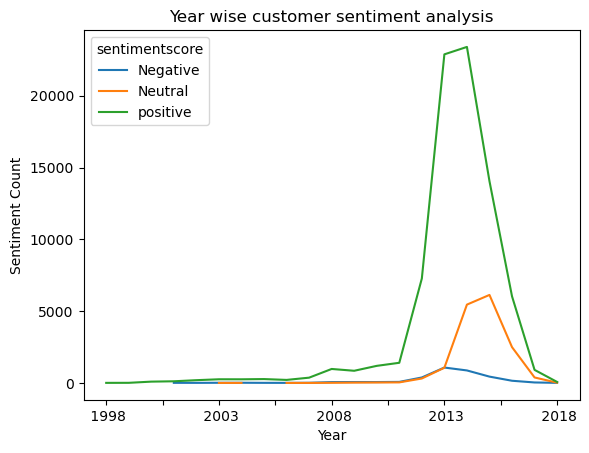

In [29]:
music_reviews.groupby(['year','sentimentscore'])['sentimentscore'].count().unstack().plot(legend=True)

plt.xlabel('Year',fontsize=10)
plt.ylabel('Sentiment Count',fontsize=10)
plt.title('Year wise customer sentiment analysis', fontsize =12)
plt.show();

### Interpretations:

* **In 2011 positive reviews are highest and there is huge drop in positive reviews in year 2017.**


* **Neutral reviews are higher in 2015. There is a dip in 2016.**


* **Negative reviews are dropping continuously from 2013.**

In [30]:
music_reviews.rename(columns={'sentimentscore':'sentiment_score'},inplace=True)

### Rating frequency for Digital Music

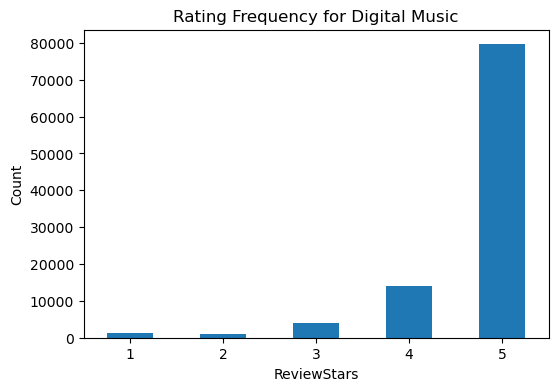

In [31]:
ax=music_reviews['overall'].value_counts().sort_index().plot(kind='bar',title='Rating Frequency for Digital Music',figsize=(6,4))
ax.set_xlabel('ReviewStars',fontsize=10)
ax.set_ylabel('Count',fontsize=10)
plt.xticks(rotation = 0)
plt.show()

### Interpretations:


* **In Digital Music majority of the products have  5-star ratings.**


* **Only few products have 1 and 2 ratings.**

### **Day of month vs Reviews count**
**Let's check if there are any relationship between reviews and day of month**

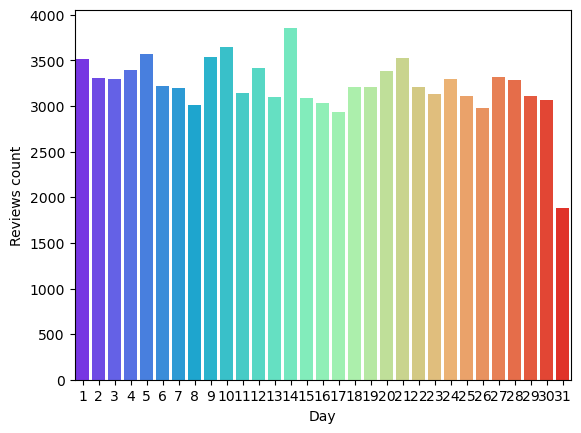

In [32]:
#Creating a dataframe
day=pd.DataFrame(music_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day,palette='rainbow')
plt.title='Day vs Reviews count'
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

### Interpretation:

* **The review counts are more or less uniformly distributed.There is not much variance between the days. But there is a huge drop at the end of month.**

In [33]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [34]:
meta_music.head()

category tech1                                        description fit  \
0       []                                                       []       
1       []                                                       []       
2       []                                                       []       
3       []                                                       []       
4       []        [1. Losing Game 2. I Can't Wait 3. Didn't He S...       

                               title  \
0       Master Collection Volume One   
1  Hymns Collection: Hymns 1 &amp; 2   
2        Early Works - Don Francisco   
3      So You Wanna Go Back to Egypt   
4          Early Works - Dallas Holm   

                                            also_buy tech2  \
0  [B000002UEN, B000008LD5, B01J804JKE, 747403435...         
1                           [5558154950, B00014K5V4]         
2  [B00004RC05, B003H8F4NA, B003ZFVHPO, B003JMP1Z...         
3  [B0000275QQ, 0001393774, 0001388312, B0016CP2G...         
4  [B0002N4JP2, 0760131694, B00002EQ79, B00150K8J...         

                    brand feature                      rank  \
0     John Michael Talbot      []   58,291 in CDs & Vinyl (   
1  Second Chapter of Acts      []   93,164 in CDs & Vinyl (   
2           Don Francisco      []  875,825 in CDs & Vinyl (   
3             Keith Green      []  203,263 in CDs & Vinyl (   
4             Dallas Holm      []  399,269 in CDs & Vinyl (   

                                           also_view  \
0  [B000002UEN, B000008LD5, 7474034352, B000008LD...   
1  [B000008KJ3, B000008KJ0, 5558154950, B000UN8KZ...   
2  [B003H8F4NA, B003ZFVHPO, B003JMP1ZK, B00004RC0...   
3  [B00000I7JO, B0016CP2GS, 0001393774, B0000275Q...   
4  [B0002N4JP2, 0760131694, B00150K8JC, B003MTXNV...   

                                            main_cat similar_item date  \
0  <img src="https://images-na.ssl-images-amazon....                     
1  <img src="https://images-na.ssl-images-amazon....                     
2  <img src="https://images-na.ssl-images-amazon....                     
3  <img src="https://images-na.ssl-images-amazon....                     
4  <img src="https://images-na.ssl-images-amazon....                     

    price        asin imageURL imageURLHighRes details  
0  $18.99  0001377647       []              []     NaN  
1          0001529145       []              []     NaN  
2          0001527134       []              []     NaN  
3  $13.01  0001388703       []              []     NaN  
4          0001526146       []              []     NaN

### Merging datasets for EDA

In [35]:
meta_music1=pd.concat([meta_music,music_rating],axis=1, join='inner')


In [36]:
meta_music.dropna(subset=['price'],inplace=True)

In [37]:
meta_music1.rename(columns={'rating':'Rating'},inplace=True)

In [38]:
meta_music1.dropna(subset=['brand','Rating','price','asin'],inplace=True)

In [39]:
music_reviews['brand']=meta_music1["brand"]

In [40]:
music_reviews

overall  verified   reviewTime      reviewerID        asin  \
0            5      True   06 3, 2013  A2TYZ821XXK2YZ  3426958910   
1            5      True  10 11, 2014  A3OFSREZADFUDY  3426958910   
2            5      True  02 11, 2014  A2VAMODP8M77NG  3426958910   
3            4     False   12 7, 2013   AAKSLZ9IDTEH0  3426958910   
4            5      True  06 12, 2016  A3OH43OZJLKI09  5557706259   
...        ...       ...          ...             ...         ...   
99995        5      True  07 13, 2014  A1FX35UETULSUD  B00K4GRDGE   
99996        5      True  07 11, 2014  A16MK76K1LD6AQ  B00K4GRDGE   
99997        5      True  07 11, 2014  A3QQQYR1EBM3R4  B00K4GRDGE   
99998        5      True  06 10, 2014   AHP9LJA75HP4V  B00K4GRDGE   
99999        5      True  06 10, 2014  A1CTC1Y3HZWJCQ  B00K4S204W   

                                                 reviews  polarity_score  \
0      awesome listen musthave slayer fanssadly neede...        0.750000   
1                                          bienfive star        0.000000   
2      great hear old stuff like new stuff recommend ...        0.345455   
3      well best ofs bit poison normally bad pretty g...        0.241986   
4      say casting crownsthis good blessing filled cd...        0.550000   
...                                                  ...             ...   
99995     love listening chris tomlin wonderfulfive star        0.500000   
99996     really getting music lately love songlove song        0.350000   
99997  chris band amazing put another great song look...        0.633333   
99998  love word truth experience living god amazing ...        0.321212   
99999  josh kelly rendition mandolin rain justice bru...        0.364394   

      sentiment_score   year month day                   brand  
0            positive   2013    06   3     John Michael Talbot  
1             Neutral   2014    10  11  Second Chapter of Acts  
2            positive   2014    02  11           Don Francisco  
3            positive   2013    12   7             Keith Green  
4            positive   2016    06  12             Dallas Holm  
...               ...    ...   ...  ..                     ...  
99995        positive   2014    07  13                     NaN  
99996        positive   2014    07  11                     NaN  
99997        positive   2014    07  11                     NaN  
99998        positive   2014    06  10                     NaN  
99999        positive   2014    06  10                     NaN  

[100000 rows x 12 columns]

### Top 10 products for Digital Music

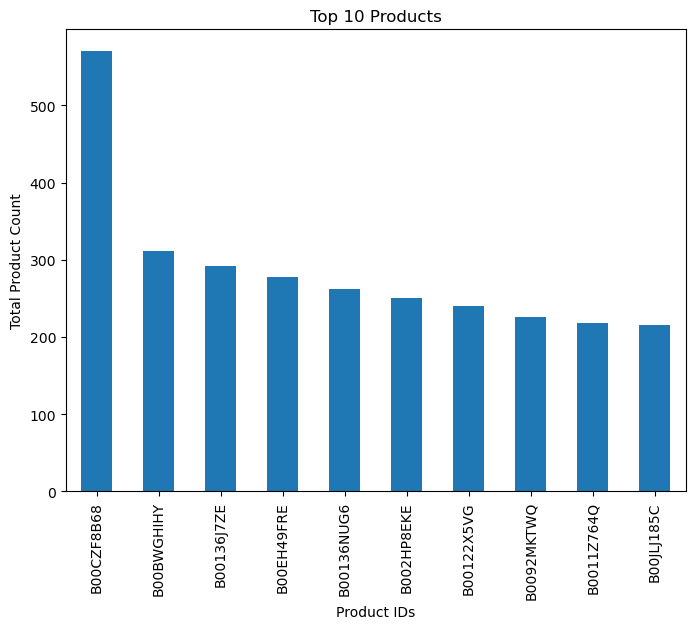

In [41]:
# Create a pandas series of the Top 10 Most Common Products
top_10 = music_reviews['asin'].value_counts()[:10]

plt.figure(figsize=(8, 6))
top_5 =  music_reviews['asin'].value_counts()[:10]
top_5.plot.bar()
plt.title('Top 10 Products', fontsize = 12)
plt.xlabel('Product IDs',fontsize = 10)
plt.ylabel('Total Product Count',fontsize = 10)
plt.show()

### Interpretation:

* **Product  with ID B00CZF8B68 is most popular Digital Music product followed by product ID B00BWGHIHY.**

# Classification Models

#### We will perform text classification model to predict the customer sentiments.

#### For the digital music product review text classification, we will build 3 classification models -
* **Logistic regression with one vs rest strategy**
* **multinomial naive bayes** 
* **random forest model.**

## Encoding target variable-sentiment


In [42]:
from sklearn import preprocessing

In [43]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
music_reviews['sentiment_label']= label_encoder.fit_transform(music_reviews['sentiment_score']) 
music_reviews['sentiment_label'].unique() 

array([2, 1, 0])

In [44]:
music_reviews['sentiment_label'].value_counts()

2    80786
1    15946
0     3268
Name: sentiment_label, dtype: int64

In [45]:
music_reviews.head()

overall  verified   reviewTime      reviewerID        asin  \
0        5      True   06 3, 2013  A2TYZ821XXK2YZ  3426958910   
1        5      True  10 11, 2014  A3OFSREZADFUDY  3426958910   
2        5      True  02 11, 2014  A2VAMODP8M77NG  3426958910   
3        4     False   12 7, 2013   AAKSLZ9IDTEH0  3426958910   
4        5      True  06 12, 2016  A3OH43OZJLKI09  5557706259   

                                             reviews  polarity_score  \
0  awesome listen musthave slayer fanssadly neede...        0.750000   
1                                      bienfive star        0.000000   
2  great hear old stuff like new stuff recommend ...        0.345455   
3  well best ofs bit poison normally bad pretty g...        0.241986   
4  say casting crownsthis good blessing filled cd...        0.550000   

  sentiment_score   year month day                   brand  sentiment_label  
0        positive   2013    06   3     John Michael Talbot                2  
1         Neutral   2014    10  11  Second Chapter of Acts                1  
2        positive   2014    02  11           Don Francisco                2  
3        positive   2013    12   7             Keith Green                2  
4        positive   2016    06  12             Dallas Holm                2

### Observations:

**This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1 and 0. To encode it we use TFIDF**

### Split data into train and test(75:25)


**Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively.**

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
## Divide the dataset into Train and Test
X_train,X_test,Y_train, Y_test = train_test_split(music_reviews['reviews'], 
                                                  music_reviews['sentiment_label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (75000,) (75000,) Test:  ((25000,), (25000,))


In [48]:
X_train

31265    surprising sophomore release india arie surpri...
3537                                   enjoyable enjoyable
57343                             favorite balladfive star
86296                               great musicgreat music
52384          bought already liked surprise herefive star
                               ...                        
46220    bought song complete dirty dancing soundtrack ...
98804    could best album since first exploring zeppeli...
48045                                        coolfive star
70053    want opinion idea held back use fifth single i...
38693    say thing last forever love song jim morrison ...
Name: reviews, Length: 75000, dtype: object

### Convert text data into vector form with help of TF-IDF vectorizer

**Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts**

In [49]:
print('TFIDF Vectorizer……')
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [50]:
tf_x_train

<75000x84906 sparse matrix of type '<class 'numpy.float64'>'
	with 1294868 stored elements in Compressed Sparse Row format>

### Logistic regression model with one vs rest strategy

In [52]:
#model building
lr=LogisticRegression()
ovr=OneVsRestClassifier(lr)

#Fit the Training data to the model
ovr.fit(tf_x_train,Y_train)


#Predicting the test data
y_test_pred=ovr.predict(tf_x_test)


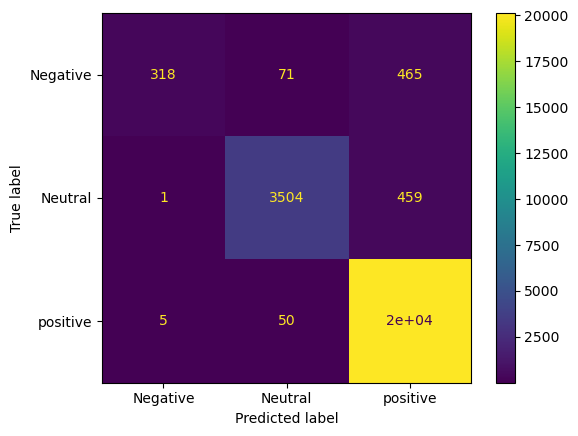

In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = metrics.confusion_matrix(Y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=  ['Negative','Neutral','positive'])
# plot.title('Confusion Matrix',fontsize=20);


cm_display.plot()
plt.show()



In [54]:
#accuracy
lr_= accuracy_score(Y_test, y_test_pred)


In [55]:
#classification report
lr=classification_report(Y_test, y_test_pred)
print(lr)

              precision    recall  f1-score   support

           0       0.98      0.37      0.54       854
           1       0.97      0.88      0.92      3964
           2       0.96      1.00      0.98     20182

    accuracy                           0.96     25000
   macro avg       0.97      0.75      0.81     25000
weighted avg       0.96      0.96      0.95     25000



### Observation:

* **logistic regression model with one vs rest strategy giving accuracy of 96%, precision 96%, recall 96% and f1 score 95%.**

# GUI

In [ ]:
from tkinter import *
model = ovr    
gui = Tk()
gui.title("review text classification")
# create labels and entry fields
label = Label(gui, text="Enter your review:")
label.pack()

entry = Entry(gui, width=50)
entry.pack()

output = Label(gui, text="", pady=10)
output.pack()

# function to predict the sentiment
def predict_sentiment():
    # get the user input
    review = entry.get()

    # preprocess the review using regex
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()

    # vectorize the review
    review_vector = vectorizer.transform([review])

    # make the prediction and output the result
    prediction = model.predict(review_vector)
    if prediction == 0:
        output.configure(text="Negative")
    elif prediction == 1:
        output.configure(text="Neutral")
    elif prediction == 2:
        output.configure(text="Positive") 

# create the predict button
button = Button(gui, text="Predict", command=predict_sentiment)
button.pack()

# start the GUI
gui.mainloop()

## Multinomial naive bayes model

In [57]:
clf = MultinomialNB()

#Fit the Training data to the model
clf.fit(tf_x_train,Y_train)

#Predicting the test data
y_test_pred=ovr.predict(tf_x_test)

#accuracy
clf_= accuracy_score(Y_test, y_test_pred)


#Analyzing the Report
clf=classification_report(Y_test, y_test_pred)

print(clf)

              precision    recall  f1-score   support

           0       0.98      0.37      0.54       854
           1       0.97      0.88      0.92      3964
           2       0.96      1.00      0.98     20182

    accuracy                           0.96     25000
   macro avg       0.97      0.75      0.81     25000
weighted avg       0.96      0.96      0.95     25000



### Observation:

* **MultinomialNB model  giving accuracy of 96%, precision 96%, recall 96% and f1 score 95%.**

## Random forest model

In [59]:
rf=RandomForestClassifier()

#fit
rf.fit(tf_x_train,Y_train)

#Predicting the test data
y_test_pred=rf.predict(tf_x_test)

#accuracy
rf_= accuracy_score(Y_test, y_test_pred)

#Analyzing the Report
rf=classification_report(Y_test, y_test_pred)
print(rf)

              precision    recall  f1-score   support

           0       1.00      0.47      0.64       854
           1       0.98      0.90      0.94      3964
           2       0.96      1.00      0.98     20182

    accuracy                           0.96     25000
   macro avg       0.98      0.79      0.85     25000
weighted avg       0.97      0.96      0.96     25000



### Observation:

* **RandomForest model  giving accuracy of 96%, precision 97%, recall 96% and f1 score 96%.**

### Interpretation:

* **We found logistic regression with one vs rest strategy is best model as it enables multiclass classification and its giving accuracy of 96%, precision 96%, recall 96% and f1 score 95%.**


* **For future forecasting of review text classification we are going to use logistic regression with one vs rest strategy.**

# Clustering for digital music dataset

* **We will perform clustering for both digital music and musical instrument product for customer segmentation.**


* **We will build Kmeans  clustering model as it groups similar data points on basis of their distance from cluster centroid, making it a popular choice for tasks like customer segmentation.**

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler

In [62]:
#fetching features for clustering
df1=music_reviews[["overall","reviews","polarity_score",'sentiment_score']]
df1.head()

overall                                            reviews  polarity_score  \
0        5  awesome listen musthave slayer fanssadly neede...        0.750000   
1        5                                      bienfive star        0.000000   
2        5  great hear old stuff like new stuff recommend ...        0.345455   
3        4  well best ofs bit poison normally bad pretty g...        0.241986   
4        5  say casting crownsthis good blessing filled cd...        0.550000   

  sentiment_score  
0        positive  
1         Neutral  
2        positive  
3        positive  
4        positive

In [63]:
#converting text to numerical by creating dummy of sentiment
df1=df1.join(pd.get_dummies(df1['sentiment_score'], prefix = 'sentiment'))

df1 .head()

overall                                            reviews  polarity_score  \
0        5  awesome listen musthave slayer fanssadly neede...        0.750000   
1        5                                      bienfive star        0.000000   
2        5  great hear old stuff like new stuff recommend ...        0.345455   
3        4  well best ofs bit poison normally bad pretty g...        0.241986   
4        5  say casting crownsthis good blessing filled cd...        0.550000   

  sentiment_score  sentiment_Negative  sentiment_Neutral  sentiment_positive  
0        positive                   0                  0                   1  
1         Neutral                   0                  1                   0  
2        positive                   0                  0                   1  
3        positive                   0                  0                   1  
4        positive                   0                  0                   1

In [64]:
# Fetching the features for clustering

dm_cluster = df1[['overall','polarity_score','sentiment_positive', 'sentiment_Negative',  'sentiment_Neutral']]

dm_cluster.head()


overall  polarity_score  sentiment_positive  sentiment_Negative  \
0        5        0.750000                   1                   0   
1        5        0.000000                   0                   0   
2        5        0.345455                   1                   0   
3        4        0.241986                   1                   0   
4        5        0.550000                   1                   0   

   sentiment_Neutral  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0

### **Scaling of data**

In [65]:
#scaling 

scaler = StandardScaler()

dm_cluster_scaled = scaler.fit_transform(dm_cluster)

### **Model Building**

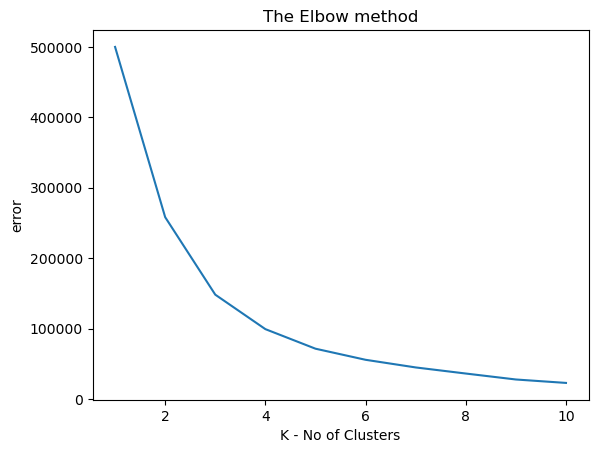

In [77]:
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter=300, random_state = 11)
    kmeans.fit(dm_cluster_scaled)
    error.append(kmeans.inertia_)
plt.plot(range(1,11), error)
plt.title('The Elbow method')
plt.xlabel('K - No of Clusters')
plt.ylabel('error')
plt.show()

### Observation:

* **In above 'Elbow plot', we can observe k value is around 5**

* **So, we can take No. of clusters =5**

In [ ]:
# Silhouette Score
from sklearn.metrics import silhouette_score
for n_clusters in range(0,6):# Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=i,max_iter=100).fit(dm_cluster_scaled)
  labels = kmeans.labels_
  sil_coeff = silhouette_score(dm_cluster_scaled,labels,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(n_clusters,sil_coeff))

For cluster= 0, Silhouette Coefficient is 0.6185952970593882


* **We are getting silhouette score 0.611 with 5 no of clusters which is not good**
* **So we will perform clustering with 3 no of clusters**

In [66]:
from sklearn.cluster import KMeans

# Model building

Model_km = KMeans(n_clusters=3,random_state=2)

Model_km.fit(dm_cluster_scaled)



KMeans(n_clusters=3, random_state=2)

In [68]:
# Adding cluster to original data

dm_cluster['Kmeans_clusters'] = Model_km.predict(dm_cluster_scaled)
dm_cluster.head()

overall  polarity_score  sentiment_positive  sentiment_Negative  \
0        5        0.750000                   1                   0   
1        5        0.000000                   0                   0   
2        5        0.345455                   1                   0   
3        4        0.241986                   1                   0   
4        5        0.550000                   1                   0   

   sentiment_Neutral  Kmeans_clusters  
0                  0                0  
1                  1                1  
2                  0                0  
3                  0                0  
4                  0                0

In [69]:
cluster_df=pd.concat([dm_cluster,df1[['reviews','sentiment_score']]],axis=1)

In [70]:
cluster_df.head()

overall  polarity_score  sentiment_positive  sentiment_Negative  \
0        5        0.750000                   1                   0   
1        5        0.000000                   0                   0   
2        5        0.345455                   1                   0   
3        4        0.241986                   1                   0   
4        5        0.550000                   1                   0   

   sentiment_Neutral  Kmeans_clusters  \
0                  0                0   
1                  1                1   
2                  0                0   
3                  0                0   
4                  0                0   

                                             reviews sentiment_score  
0  awesome listen musthave slayer fanssadly neede...        positive  
1                                      bienfive star         Neutral  
2  great hear old stuff like new stuff recommend ...        positive  
3  well best ofs bit poison normally bad pretty g...        positive  
4  say casting crownsthis good blessing filled cd...        positive

In [71]:
#computing mean value for each column

dm_cl_mean= cluster_df.groupby('Kmeans_clusters').mean()

dm_cl_mean.head() 

overall  polarity_score  sentiment_positive  \
Kmeans_clusters                                                 
0                4.729384        0.457598                 1.0   
1                4.665057        0.000000                 0.0   
2                3.948286       -0.200072                 0.0   

                 sentiment_Negative  sentiment_Neutral  
Kmeans_clusters                                         
0                               0.0                0.0  
1                               0.0                1.0  
2                               1.0                0.0

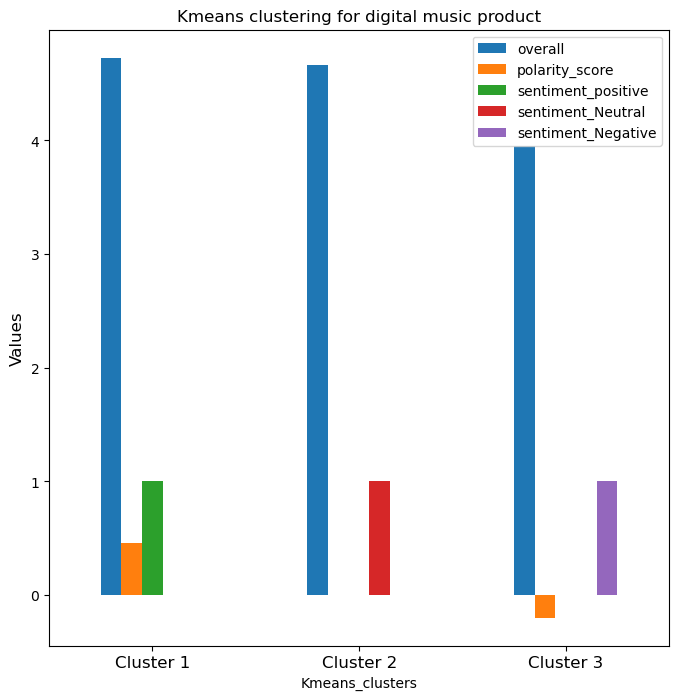

In [72]:
# cluster analysis
dm_cl_mean[['overall','polarity_score','sentiment_positive',   'sentiment_Neutral','sentiment_Negative']].plot(kind = 'bar', figsize = (8,8))

plt.title('Kmeans clustering for digital music product', fontsize=12)

plt.ylabel('Values', fontsize=12)

plt.xticks(rotation = 0)

plt.gca().set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'], fontsize=12)

plt.show()



### Interpretation:


* **Cluster 1 is the group of happy customers because they have high product rating and positive sentiment.**  


* **Cluster 2 have dissatisfied customers as they have negative sentiments and lower rating as compare to other clusters.**


* **Cluster 3 is group of satisfied customers as they have neutral sentiments and high ratings.** 

# Time series analysis

**We will perform Time series analysis to forecast customers sentiments in future based on historical data.**

### Time series analysis for positive reviews

In [73]:
timeseries_df=music_reviews[['reviewTime','polarity_score']][:100000].copy()

In [74]:
timeseries_df.to_csv('file1.csv')


In [75]:
df = pd.read_csv('file1.csv', index_col='reviewTime',parse_dates=True)


In [76]:
df.sort_index(inplace=True)

In [77]:
df.drop(columns='Unnamed: 0',inplace=True)

In [78]:
df.head()

polarity_score
reviewTime                
1998-07-09        0.260089
1998-08-21        0.320000
1998-08-21        0.320000
1998-09-06        0.071667
1998-12-17        0.271886

In [79]:
positive_df=df[df['polarity_score'] > 0 ] 
    
print('\nResult dataframe :\n', positive_df)


Result dataframe :
             polarity_score
reviewTime                
1998-07-09        0.260089
1998-08-21        0.320000
1998-08-21        0.320000
1998-09-06        0.071667
1998-12-17        0.271886
...                    ...
2018-04-04        0.700000
2018-04-06        0.120000
2018-04-06        0.800000
2018-04-14        0.500000
2018-04-14        0.500000

[80786 rows x 1 columns]


### **since its daily data we areconverting it to monthly data**

In [80]:
pos_df=positive_df.resample('M').mean()

In [81]:
pos_df

polarity_score
reviewTime                
1998-07-31        0.260089
1998-08-31        0.320000
1998-09-30        0.071667
1998-10-31             NaN
1998-11-30             NaN
...                    ...
2017-12-31        0.602273
2018-01-31        0.467729
2018-02-28        0.533475
2018-03-31        0.493059
2018-04-30        0.613333

[238 rows x 1 columns]

In [82]:
pos_df1=pos_df[['polarity_score']]

In [83]:
pos_df1.fillna(pos_df.mean(),inplace=True)

In [84]:
pos_df1

polarity_score
reviewTime                
1998-07-31        0.260089
1998-08-31        0.320000
1998-09-30        0.071667
1998-10-31        0.343960
1998-11-30        0.343960
...                    ...
2017-12-31        0.602273
2018-01-31        0.467729
2018-02-28        0.533475
2018-03-31        0.493059
2018-04-30        0.613333

[238 rows x 1 columns]

In [85]:

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

!pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### visualisation of data

<AxesSubplot:xlabel='reviewTime'>

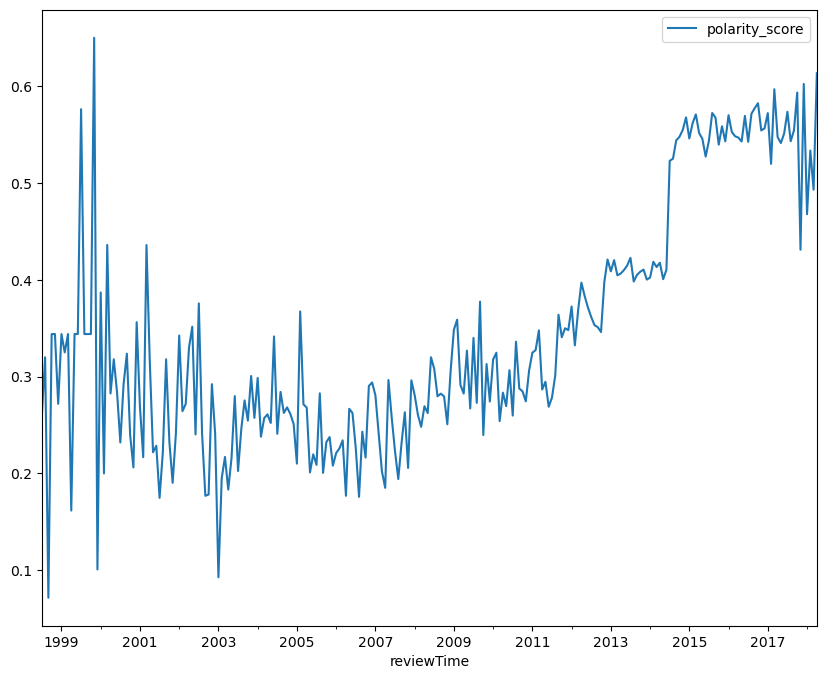

In [86]:
pos_df1.plot(figsize=(10,8))

### **View all time series components**

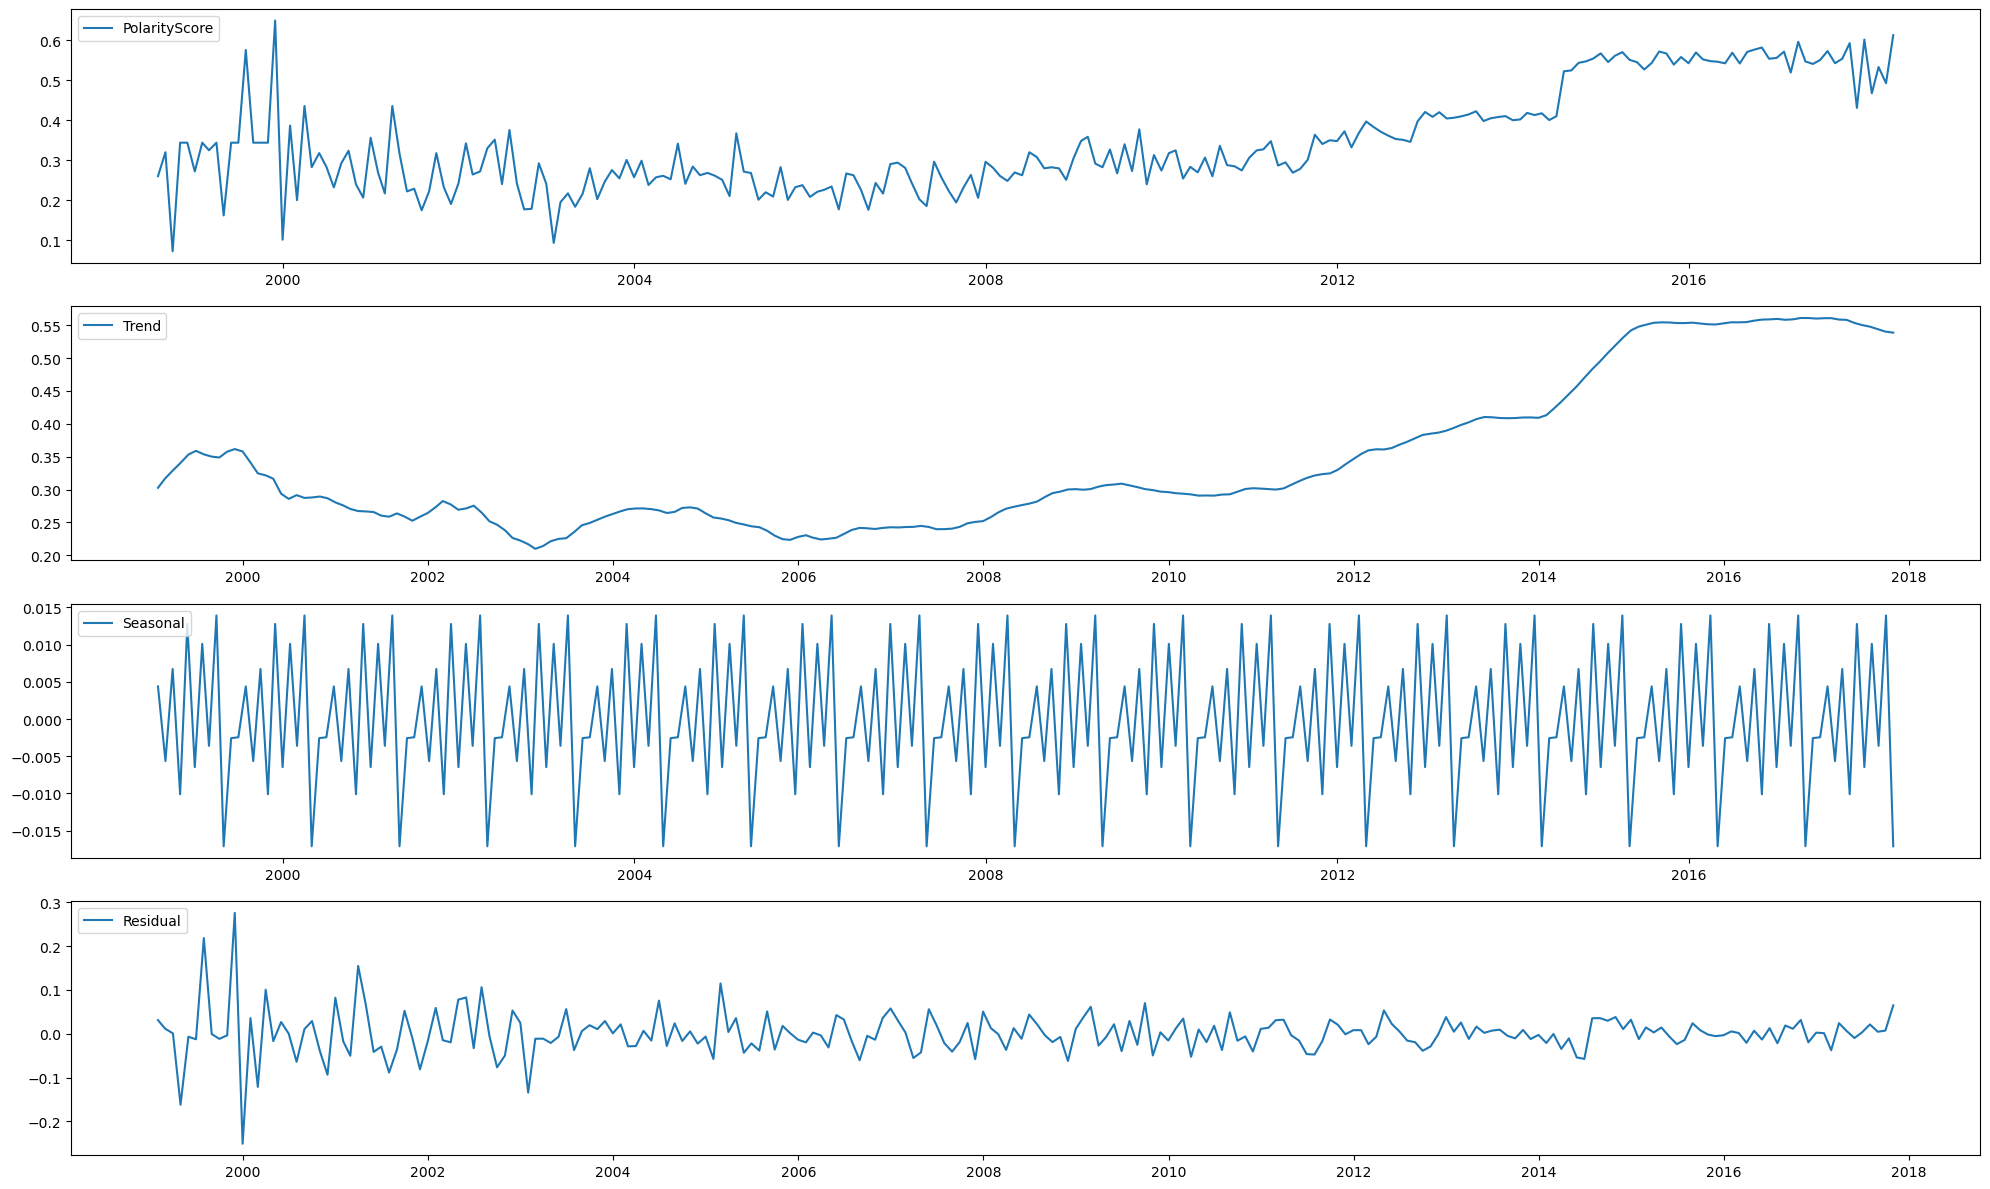

In [87]:
# different components of the Time series data
# period = 12 since the data is monthly

decomposition=seasonal_decompose(pos_df1, period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


# plotting all the 4 graphs
fig,ax=plt.subplots(4,1, figsize=(20,12))
plt.subplot(411)
plt.plot(pos_df1,label="PolarityScore")
plt.legend(loc= 'upper left' )


plt.subplot(412)
plt.plot(d_trend,label="Trend")
plt.legend(loc= 'upper left' )

plt.subplot(413)
plt.plot(d_seasonal,label="Seasonal")
plt.legend(loc= 'upper left' )

plt.subplot(414)
plt.plot(d_residual,label="Residual")
plt.legend(loc= 'upper left' )


plt.tight_layout()

### Check for stationarity

In [88]:
# dickey-fuller test for stationarity
def checkStationarity(pos_df1):
    pvalue = adfuller(pos_df1)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [89]:
# check the data for stationarity
ret=checkStationarity(pos_df1); 
ret

'p-value=0.7745090406540627. Data is not stationary'

### **Differencing the data**

In [90]:
# difference the data by lag 1

from statsmodels.tsa.statespace.tools import diff


pos_df1['lag1'] = diff(pos_df1['polarity_score'], k_diff =1)

pos_df1.head()

polarity_score      lag1
reviewTime                          
1998-07-31        0.260089       NaN
1998-08-31        0.320000  0.059911
1998-09-30        0.071667 -0.248333
1998-10-31        0.343960  0.272293
1998-11-30        0.343960  0.000000

In [91]:
# dickey-fuller test for stationarity

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    
    if pvalue < 0.05 :
        msg = "pvalue = {}. Data is Stationary. Proceed for  model building".format(pvalue)
        
    else:
        msg = "pvalue = {}.Data is not stationary. Make the data stationary before building a model".format(pvalue)
        
    return(msg)

In [92]:
# check the data for stationarity

print(checkStationarity(pos_df1.lag1.dropna()))

5.107857153268529e-16
pvalue = 5.107857153268529e-16. Data is Stationary. Proceed for  model building


### Observation


* **By taking lag 1 difference the data becomes stationary.**

### ACF & PACF plot

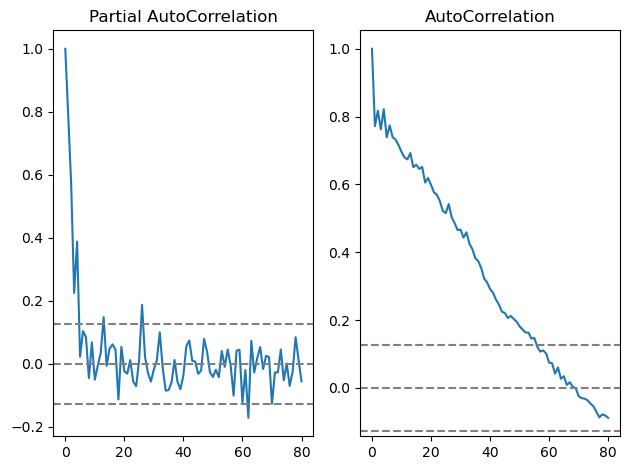

In [93]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(pos_df1['polarity_score'], nlags=80)
lag_pacf = pacf(pos_df1['polarity_score'], nlags=80, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(pos_df1['polarity_score'])),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(pos_df1['polarity_score'])),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(pos_df1['polarity_score'])),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(pos_df1['polarity_score'])),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()





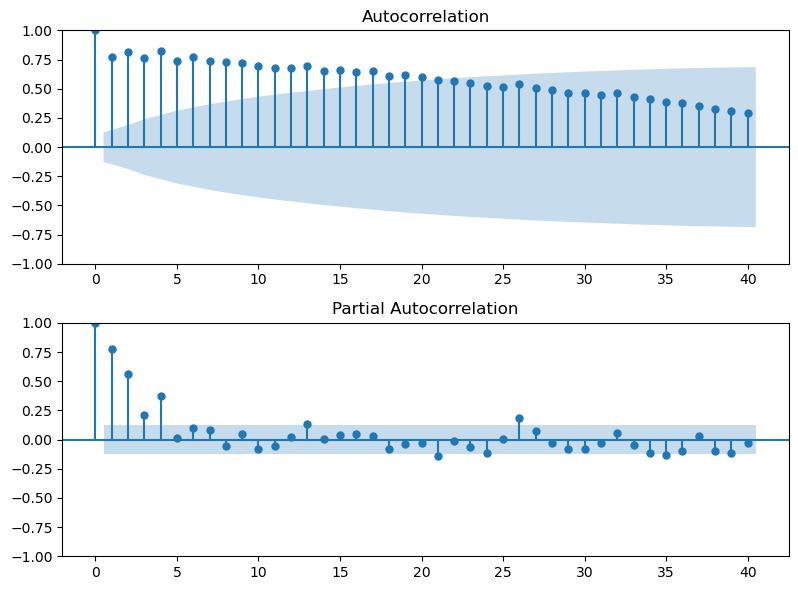

In [94]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(pos_df1['polarity_score'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(pos_df1['polarity_score'], lags=40, ax=ax2)

plt.tight_layout()


### split the data into train and test

In [95]:
# split the data into train and test
ss = int(0.7 * len(pos_df1))

train = pos_df1.iloc[:ss]
test = pos_df1.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 166, test = 72


### **ARIMA model for train dataset**

**Checking p,d,q value by autoarima.**

In [96]:
#auto arima

tt = auto_arima(train['polarity_score'], start_p = 0, max_p  = 3, start_q =0, max_q = 4, seasonal = False, trace =True)

print(tt.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-309.002, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-381.945, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-418.366, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-310.989, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-421.014, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-419.325, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-423.917, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-420.673, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-421.965, Time=0.60 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-422.008, Time=0.66 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-418.278, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-422.361, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-425.696, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-422.411, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]          

### Interpretation:

* **p,d,q value based on auto arima(1,1,2) is best values.**

**Checking p,d,q value manually.**

In [97]:
# With p=1,d=1,q=1
ar_m1 = ARIMA(train['polarity_score'], order = (1,1,1))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                  166
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 214.381
Date:                Mon, 08 May 2023   AIC                           -422.763
Time:                        09:34:07   BIC                           -413.445
Sample:                    07-31-1998   HQIC                          -418.980
                         - 04-30-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2043      0.094     -2.180      0.029      -0.388      -0.021
ma.L1         -0.7868      0.059    -13.326      0.000      -0.902      -0.671
sigma2         0.0043      0.000     15.025      0.0

In [98]:
# With p=1,d=1,q=2
ar_m2 = ARIMA(train['polarity_score'], order = (1,1,2))
r2= ar_m2.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                  166
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 216.848
Date:                Mon, 08 May 2023   AIC                           -425.696
Time:                        09:34:08   BIC                           -413.273
Sample:                    07-31-1998   HQIC                          -420.653
                         - 04-30-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8499      0.126     -6.733      0.000      -1.097      -0.602
ma.L1         -0.1130      0.163     -0.692      0.489      -0.433       0.207
ma.L2         -0.5971      0.166     -3.588      0.0

In [99]:
# With p=2,d=2,q=2
ar_m2 = ARIMA(train['polarity_score'], order = (2,1,1))
r2= ar_m2.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                  166
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 214.550
Date:                Mon, 08 May 2023   AIC                           -421.100
Time:                        09:34:08   BIC                           -408.676
Sample:                    07-31-1998   HQIC                          -416.056
                         - 04-30-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1548      0.095     -1.632      0.103      -0.341       0.031
ar.L2          0.0675      0.075      0.906      0.365      -0.079       0.214
ma.L1         -0.8307      0.055    -15.035      0.0

### Interpetation:

* **With p=1,d=1,q=2 gives the lower AIC value for ARIMA model for train dataset.**


### **ARIMA model for test dataset**

**Checking p,d,q value by autoarima.**

In [100]:
#auto arima

tt = auto_arima(test['polarity_score'], start_p = 0, max_p  = 3, start_q =0, max_q = 4, seasonal = False, trace =True)

print(tt.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-239.270, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-277.610, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-267.209, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-240.879, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-275.843, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-275.875, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-273.922, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-278.310, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-276.427, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-276.437, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-267.076, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-274.357, Time=0.26 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.605 seconds
                               SARIMAX Results                                
Dep. Vari

**Checking p,d,q value manually.**

In [101]:
ar_m1 = ARIMA(test['polarity_score'], order = (1,1,0))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                   72
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 141.155
Date:                Mon, 08 May 2023   AIC                           -278.310
Time:                        09:34:19   BIC                           -273.785
Sample:                    05-31-2012   HQIC                          -276.510
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6837      0.068     -9.981      0.000      -0.818      -0.549
sigma2         0.0011    9.7e-05     11.214      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.17   Jarque-

In [102]:
ar_m1 = ARIMA(test['polarity_score'], order = (1,1,1))
r2= ar_m1.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 141.218
Date:                Mon, 08 May 2023   AIC                           -276.437
Time:                        09:34:20   BIC                           -269.649
Sample:                    05-31-2012   HQIC                          -273.737
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6475      0.175     -3.705      0.000      -0.990      -0.305
ma.L1         -0.0668      0.192     -0.348      0.727      -0.443       0.309
sigma2         0.0011   9.71e-05     11.188      0.0

### Interpetation:

* **With p=1,d=1,q=0 gives the lower AIC value for ARIMA model for test dataset.**

### **SARIMA model**

In [103]:
p=1;d=1;q=1; season_order=12

model = SARIMAX(train['polarity_score'], order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     polarity_score   No. Observations:                  166
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 179.990
Date:                            Mon, 08 May 2023   AIC                           -349.979
Time:                                    09:34:24   BIC                           -334.827
Sample:                                07-31-1998   HQIC                          -343.824
                                     - 04-30-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1824      0.087     -2.097      0.036      -0.353      -0.012
ma.L1         -0.7910      0.070   

In [104]:
p=2;d=1;q=1; season_order=12

model1 = SARIMAX(train['polarity_score'], order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

print(model1.summary())


                                     SARIMAX Results                                      
Dep. Variable:                     polarity_score   No. Observations:                  166
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 183.243
Date:                            Mon, 08 May 2023   AIC                           -352.487
Time:                                    09:34:30   BIC                           -331.274
Sample:                                07-31-1998   HQIC                          -343.870
                                     - 04-30-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1764      0.111     -1.593      0.111      -0.394       0.041
ar.L2          0.0782      0.085   

In [105]:
p=1;d=1;q=2; season_order=12

model2 = SARIMAX(train['polarity_score'], order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

print(model2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     polarity_score   No. Observations:                  166
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                 181.938
Date:                            Mon, 08 May 2023   AIC                           -349.876
Time:                                    09:34:34   BIC                           -328.663
Sample:                                07-31-1998   HQIC                          -341.258
                                     - 04-30-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8302      0.165     -5.046      0.000      -1.153      -0.508
ma.L1         -0.1271      0.187   

### Interpetation:

* **Best model SARIMAX[p=2;d=1;q=1]**

In [106]:
len(pos_df1)-1

237

In [107]:
predictions = model1.predict(start =166 , end = 237) 

In [108]:
# actual vs predicted values

actual =[]
pred = []

for i in range(len(predictions)):  
    actual.append(test['polarity_score'][i]) 
    pred.append(predictions[i]) 

df_res = pd.DataFrame({'actual' : actual, 'predicted': pred})
df_res['err'] = df_res.actual - df_res.predicted 
print(df_res)

      actual  predicted       err
0   0.383196   0.358597  0.024599
1   0.371308   0.365408  0.005899
2   0.361594   0.364367 -0.002773
3   0.353168   0.336304  0.016864
4   0.351095   0.376704 -0.025609
..       ...        ...       ...
67  0.602273   0.435799  0.166474
68  0.467729   0.455396  0.012333
69  0.533475   0.449684  0.083791
70  0.493059   0.437050  0.056009
71  0.613333   0.429573  0.183761

[72 rows x 3 columns]


### **Plot the errors**

<AxesSubplot:>

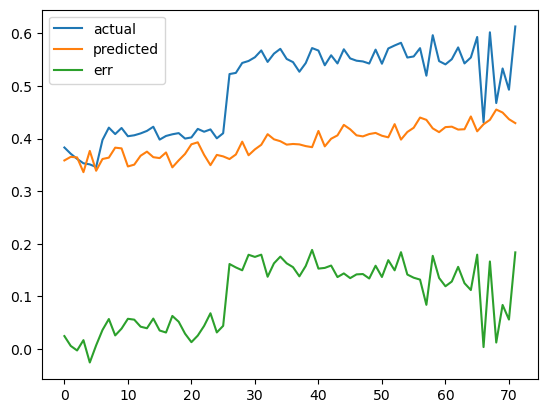

In [109]:
# errors
df_res.plot()

### **Perform the LJung-Box test**

In [110]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### **Calculate MSE and RMSE of the Model from the test**

In [111]:
# MSE
msg = 'model1. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

model1. Order=(1,2)
	MSE = 0.014341940106148445
	RMSE = 0.11975783943503843


### **Plot the actual data and predicted data**

Text(0.5, 1.0, 'model1. Order=(1,2)')

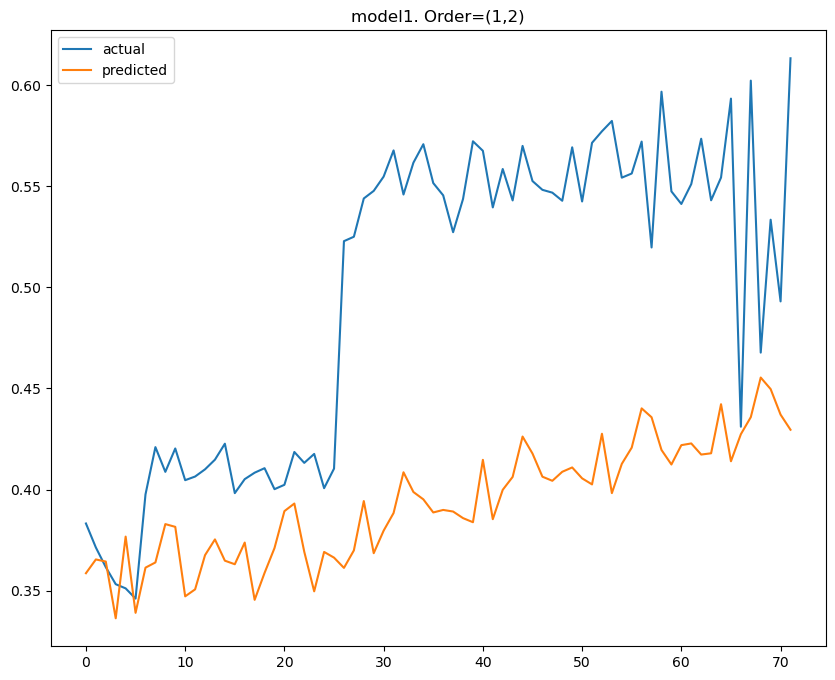

In [112]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

### forecast into the future

In [113]:
# forecast into the future
p=2; q=1; d=1
m2 = sm.tsa.statespace.SARIMAX(pos_df1['polarity_score'],order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
fcast = m2.predict(start=len(pos_df1), end=len(pos_df1)+23, typ='levels').rename('Forecast trend')
print(fcast)

2018-05-31    0.522215
2018-06-30    0.545177
2018-07-31    0.558642
2018-08-31    0.563041
2018-09-30    0.572505
2018-10-31    0.561027
2018-11-30    0.569072
2018-12-31    0.581290
2019-01-31    0.579645
2019-02-28    0.586814
2019-03-31    0.575517
2019-04-30    0.580641
2019-05-31    0.575324
2019-06-30    0.579317
2019-07-31    0.589280
2019-08-31    0.601757
2019-09-30    0.611232
2019-10-31    0.597767
2019-11-30    0.616751
2019-12-31    0.606195
2020-01-31    0.626140
2020-02-29    0.608805
2020-03-31    0.626665
2020-04-30    0.601740
Freq: M, Name: Forecast trend, dtype: float64


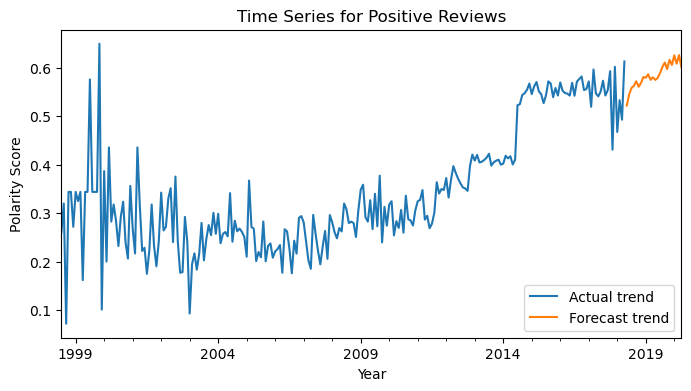

In [114]:
pos_df1['polarity_score'].rename('Actual trend').plot(figsize =(8,4), legend = True)
plt.title('Time Series for Positive Reviews',fontsize=12)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Polarity Score',fontsize=10)
fcast.plot(legend = True)
plt.show()





### Interpretation:
* **The SARIMA model for digital music shows that positive reviews trend to go up from 2018-2021.**

## Time series analysis for Negative reviews

In [115]:
neg_df=df[df['polarity_score'] < 0 ] 
    
print('\nResult dataframe :\n', neg_df)


Result dataframe :
             polarity_score
reviewTime                
2001-01-04       -0.014583
2001-06-12       -0.000298
2001-06-12       -0.000298
2001-07-12       -0.106250
2001-07-21       -0.016667
...                    ...
2018-01-10       -0.250000
2018-01-10       -0.250000
2018-02-11       -0.037500
2018-03-20       -0.200000
2018-03-26       -0.166667

[3268 rows x 1 columns]


### Since its daily data we are converting it to monthly data

In [116]:
df_neg=neg_df.resample('M').mean()

In [117]:
neg_df1=df_neg[['polarity_score']]

In [118]:
neg_df1.fillna(pos_df.mean(),inplace=True)

### Visualisation of data

<AxesSubplot:xlabel='reviewTime'>

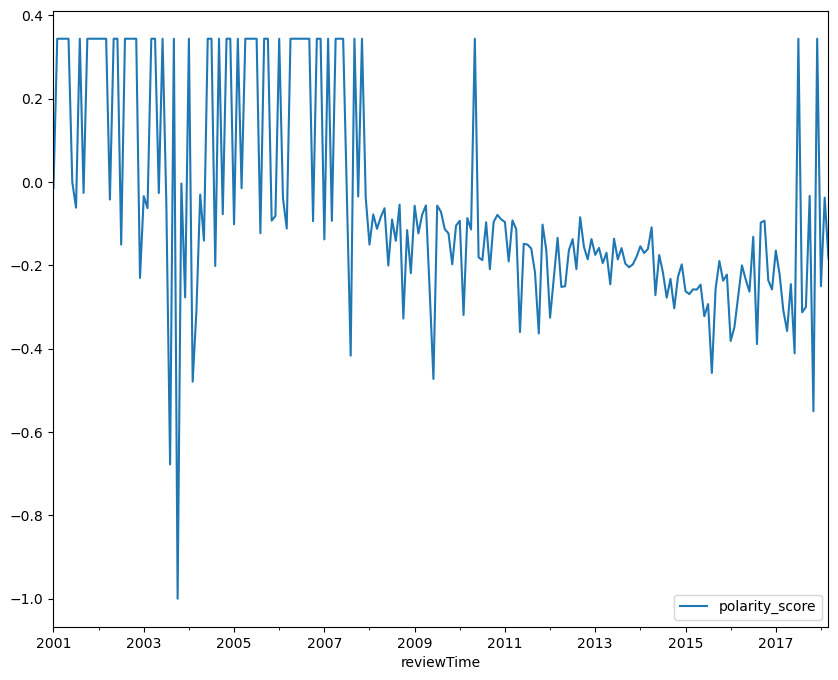

In [119]:
neg_df1.plot(figsize=(10,8))

### **View all time series components**

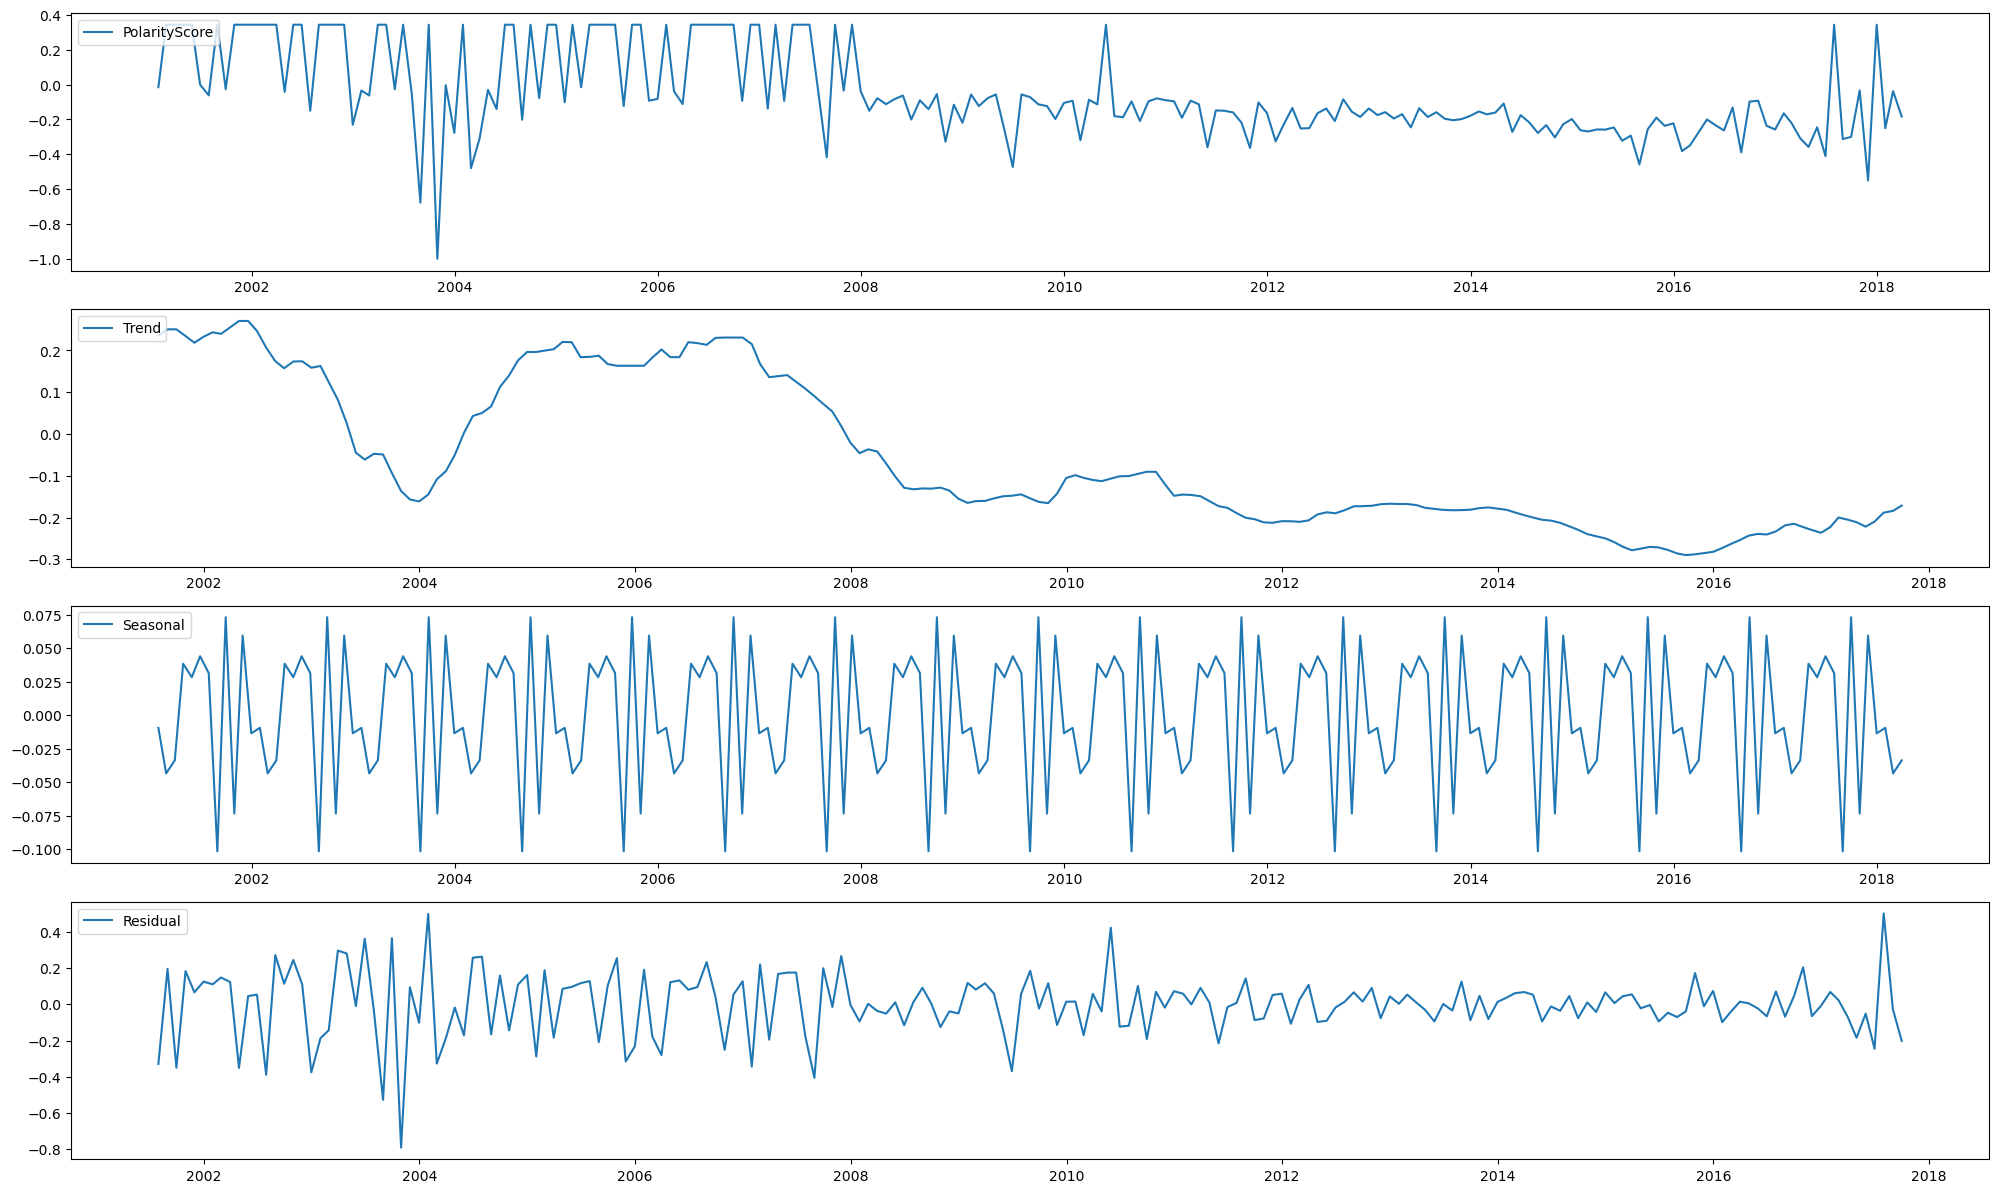

In [120]:
# different components of the Time series data
# period = 12 since the data is monthly

decomposition=seasonal_decompose(neg_df1, period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


# plotting all the 4 graphs
fig,ax=plt.subplots(4,1, figsize=(20,12))
plt.subplot(411)
plt.plot(neg_df1,label="PolarityScore")
plt.legend(loc= 'upper left' )


plt.subplot(412)
plt.plot(d_trend,label="Trend")
plt.legend(loc= 'upper left' )

plt.subplot(413)
plt.plot(d_seasonal,label="Seasonal")
plt.legend(loc= 'upper left' )

plt.subplot(414)
plt.plot(d_residual,label="Residual")
plt.legend(loc= 'upper left' )


plt.tight_layout()

### Check for stationarity

In [121]:
# dickey-fuller test for stationarity
def checkStationarity(neg_df1):
    pvalue = adfuller(neg_df1)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [122]:
# check the data for stationarity

print(checkStationarity(neg_df1))

p-value=0.2901724312956147. Data is not stationary


### difference the data

In [123]:
# difference the data by lag 1

from statsmodels.tsa.statespace.tools import diff


neg_df1['lag1'] = diff(neg_df1['polarity_score'], k_diff =1)

neg_df1.head()

polarity_score      lag1
reviewTime                          
2001-01-31       -0.014583       NaN
2001-02-28        0.343960  0.358543
2001-03-31        0.343960  0.000000
2001-04-30        0.343960  0.000000
2001-05-31        0.343960  0.000000

In [124]:
# dickey-fuller test for stationarity

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    
    if pvalue < 0.05 :
        msg = "pvalue = {}. Data is Stationary. Proceed for  model building".format(pvalue)
        
    else:
        msg = "pvalue = {}.Data is not stationary. Make the data stationary before building a model".format(pvalue)
        
    return(msg)

In [125]:
# check the data for stationarity

print(checkStationarity(neg_df1.lag1.dropna()))

5.932120412470721e-07
pvalue = 5.932120412470721e-07. Data is Stationary. Proceed for  model building


### ACF & PACF plot

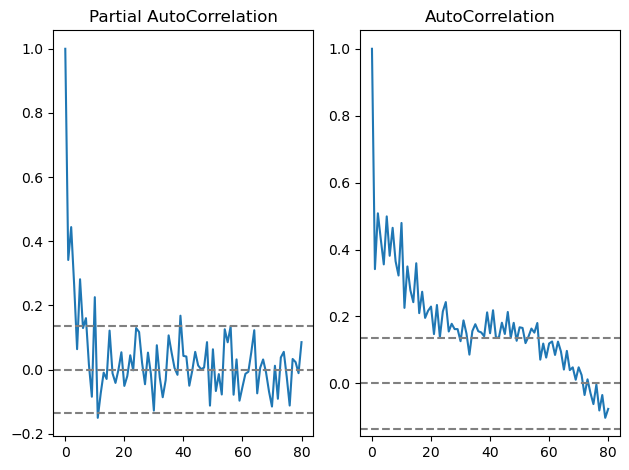

In [126]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(neg_df1['polarity_score'], nlags=80)
lag_pacf = pacf(neg_df1['polarity_score'], nlags=80, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(neg_df1['polarity_score'])),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(neg_df1['polarity_score'])),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(neg_df1['polarity_score'])),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(neg_df1['polarity_score'])),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()


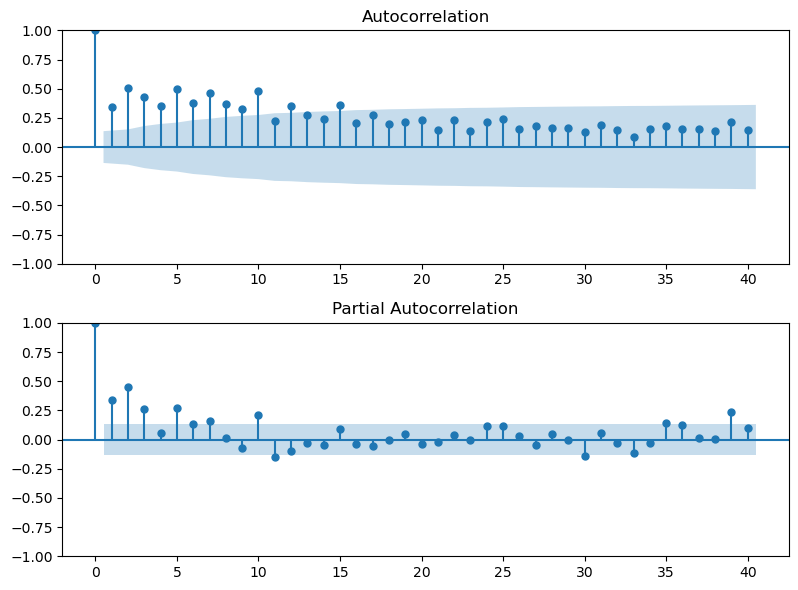

In [127]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(neg_df1['polarity_score'], lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(neg_df1['polarity_score'], lags=40, ax=ax2)

plt.tight_layout()

### split the data into train and test

In [128]:
# splitting the data into train and test
ss = int(0.7 * len(neg_df1))

train = neg_df1.iloc[:ss]
test = neg_df1.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 144, test = 63


### **ARIMA model for train dataset**

**Check p,d,q values by autoarima**

In [129]:
#auto arima

tt = auto_arima(train['polarity_score'], start_p = 0, max_p  = 3, start_q =0, max_q = 4, seasonal = False, trace =True)

print(tt.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=86.521, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21.453, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8.019, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=84.522, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10.999, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9.254, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9.164, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10.359, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6.189, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7.209, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-12.404, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-9.130, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=19.474, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-10.598, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-10.539, Time=0.

**Check p,d,q values manually**

In [130]:
# With p=1,d=1,q=1
ar_m1 = ARIMA(train['polarity_score'], order = (1,1,1))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   9.202
Date:                Mon, 08 May 2023   AIC                            -12.404
Time:                        09:35:14   BIC                             -3.516
Sample:                    01-31-2001   HQIC                            -8.792
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2293      0.071     -3.210      0.001      -0.369      -0.089
ma.L1         -0.7632      0.055    -13.837      0.000      -0.871      -0.655
sigma2         0.0510      0.004     12.348      0.0

In [131]:
# With p=1,d=1,q=2
ar_m1 = ARIMA(train['polarity_score'], order = (1,1,2))
r2 = ar_m1.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                  144
Model:                 ARIMA(1, 1, 2)   Log Likelihood                   9.269
Date:                Mon, 08 May 2023   AIC                            -10.539
Time:                        09:35:16   BIC                              1.313
Sample:                    01-31-2001   HQIC                            -5.723
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3439      0.350     -0.983      0.325      -1.029       0.341
ma.L1         -0.6451      0.387     -1.669      0.095      -1.403       0.112
ma.L2         -0.1012      0.322     -0.314      0.7

In [132]:
# With p=2,d=1,q=1
ar_m1 = ARIMA(train['polarity_score'], order = (2,1,1))
r3 = ar_m1.fit()
print(r3.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                   9.299
Date:                Mon, 08 May 2023   AIC                            -10.598
Time:                        09:35:17   BIC                              1.253
Sample:                    01-31-2001   HQIC                            -5.782
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1999      0.107     -1.868      0.062      -0.410       0.010
ar.L2          0.0476      0.099      0.484      0.629      -0.145       0.241
ma.L1         -0.7861      0.070    -11.183      0.0

### Interpetation:

**p,d,q=(1,1,1) gives the lower AIC value for ARIMA model**

### **ARIMA with test data**

**Check p,d,q values by autoarima**

In [133]:
tt = auto_arima(test['polarity_score'], start_p = 0, max_p  = 3, start_q =0, max_q = 4, seasonal = False, trace =True)

print(tt.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8.274, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-20.650, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3.427, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-51.230, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-61.047, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-68.372, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-70.303, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-61.204, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-68.368, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-69.954, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-72.794, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-71.542, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-72.388, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-77.215, Tim

**Check p,d,q values manually**

In [134]:
# With p=1,d=1,q=1
ar_m1 = ARIMA(test['polarity_score'], order = (1,1,1))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                   63
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  38.747
Date:                Mon, 08 May 2023   AIC                            -71.494
Time:                        09:35:24   BIC                            -65.113
Sample:                    01-31-2013   HQIC                           -68.988
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4312      0.097     -4.452      0.000      -0.621      -0.241
ma.L1         -0.8194      0.100     -8.160      0.000      -1.016      -0.623
sigma2         0.0163      0.002      7.309      0.0

In [135]:
# With p=3,d=0,q=1
ar_m1 = ARIMA(test['polarity_score'], order = (1,1,2))
r2 = ar_m1.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:         polarity_score   No. Observations:                   63
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  38.771
Date:                Mon, 08 May 2023   AIC                            -69.542
Time:                        09:35:25   BIC                            -61.033
Sample:                    01-31-2013   HQIC                           -66.201
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3761      0.293     -1.283      0.200      -0.951       0.198
ma.L1         -0.8850      0.337     -2.628      0.009      -1.545      -0.225
ma.L2          0.0621      0.318      0.195      0.8

### Interpetation:

**p,d,q=(3,0,1) gives the lower AIC value test data for ARIMA model.**

### **SARIMA Model for train data**

In [136]:
p=1;d=1;q=1; season_order=12

model1 = SARIMAX(train['polarity_score'], order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

print(model1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     polarity_score   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -5.486
Date:                            Mon, 08 May 2023   AIC                             20.972
Time:                                    09:35:29   BIC                             35.348
Sample:                                01-31-2001   HQIC                            26.813
                                     - 12-31-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2213      0.081     -2.743      0.006      -0.379      -0.063
ma.L1         -0.7572      0.071   

In [137]:
p=2;d=1;q=1; season_order=12

model2 = SARIMAX(train['polarity_score'], order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

print(model2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     polarity_score   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                  -5.481
Date:                            Mon, 08 May 2023   AIC                             24.961
Time:                                    09:35:33   BIC                             45.088
Sample:                                01-31-2001   HQIC                            33.139
                                     - 12-31-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2123      0.119     -1.786      0.074      -0.445       0.021
ar.L2          0.0119      0.103   

In [138]:
p=1;d=1;q=2; season_order=12

model3 = SARIMAX(train['polarity_score'], order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

print(model3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     polarity_score   No. Observations:                  144
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                  -5.529
Date:                            Mon, 08 May 2023   AIC                             25.058
Time:                                    09:35:36   BIC                             45.184
Sample:                                01-31-2001   HQIC                            33.236
                                     - 12-31-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2366      0.407     -0.582      0.561      -1.034       0.561
ma.L1         -0.7337      0.426   

### Interpetation:

**p,d,q=(1,1,1) gives the lower AIC value for train data for ARIMA model.**

### **SARIMA Model for test data**

In [139]:
p=1;d=1;q=1; season_order=12

model1 = SARIMAX(test['polarity_score'], order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

print(model1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     polarity_score   No. Observations:                   63
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  24.034
Date:                            Mon, 08 May 2023   AIC                            -38.069
Time:                                    09:35:37   BIC                            -28.508
Sample:                                01-31-2013   HQIC                           -34.428
                                     - 03-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3038      0.252     -1.208      0.227      -0.797       0.189
ma.L1         -0.8413      0.133   

In [140]:
p=2;d=1;q=1; season_order=12

model2 = SARIMAX(test['polarity_score'], order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

print(model2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     polarity_score   No. Observations:                   63
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                  24.163
Date:                            Mon, 08 May 2023   AIC                            -34.327
Time:                                    09:35:39   BIC                            -20.942
Sample:                                01-31-2013   HQIC                           -29.230
                                     - 03-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2832      0.302     -0.937      0.349      -0.875       0.309
ar.L2          0.0615      0.170   

In [141]:
p=1;d=1;q=2; season_order=12

model3 = SARIMAX(test['polarity_score'], order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()

print(model3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     polarity_score   No. Observations:                   63
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                  24.187
Date:                            Mon, 08 May 2023   AIC                            -34.373
Time:                                    09:35:41   BIC                            -20.989
Sample:                                01-31-2013   HQIC                           -29.276
                                     - 03-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4776      0.504     -0.947      0.344      -1.466       0.511
ma.L1         -0.6622      0.616   

### Interpetation:

**p,d,q=(1,1,1) gives the lower AIC value for both train and test data for SARIMA model.**

In [142]:
len(neg_df1)-1

206

In [143]:
len(train)

144

In [144]:
#predictions
predictions = model1.predict(start =144 , end = 206) 

In [145]:
# actual vs predicted values

actual =[]
pred = []

for i in range(len(predictions)):  
    actual.append(test['polarity_score'][i]) 
    pred.append(predictions[i]) 

df_res = pd.DataFrame({'actual' : actual, 'predicted': pred})
df_res['err'] = df_res.actual - df_res.predicted 
print(df_res)

      actual  predicted       err
0  -0.174756   0.059804 -0.234560
1  -0.158043   0.141265 -0.299308
2  -0.194688   0.076460 -0.271147
3  -0.169640   0.060711 -0.230351
4  -0.245420   0.069307 -0.314727
..       ...        ...       ...
58 -0.550000   0.060029 -0.610029
59  0.343960   0.406642 -0.062683
60 -0.250000   0.171861 -0.421861
61 -0.037500   0.246081 -0.283581
62 -0.183333   0.185754 -0.369087

[63 rows x 3 columns]


### **Plot the errors**

<AxesSubplot:>

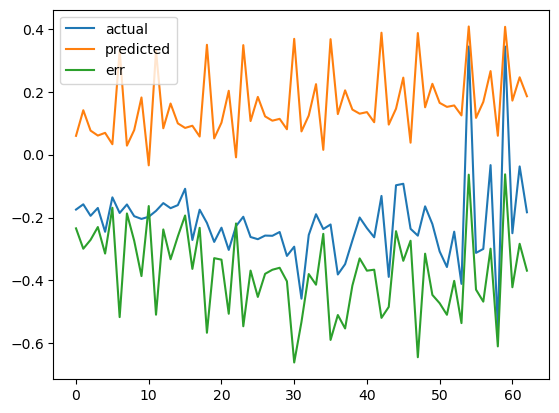

In [146]:
# errors
df_res.plot()

### **Perform LJung-Box test**

In [147]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(model1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### **Calculate MSE and RMSE**

In [148]:
# MSE
msg = 'model1. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

model1. Order=(1,2)
	MSE = 0.1580230686093033
	RMSE = 0.39752115492046874


### **Plot Actual and predicted data**

Text(0.5, 1.0, 'model1. Order=(1,2)')

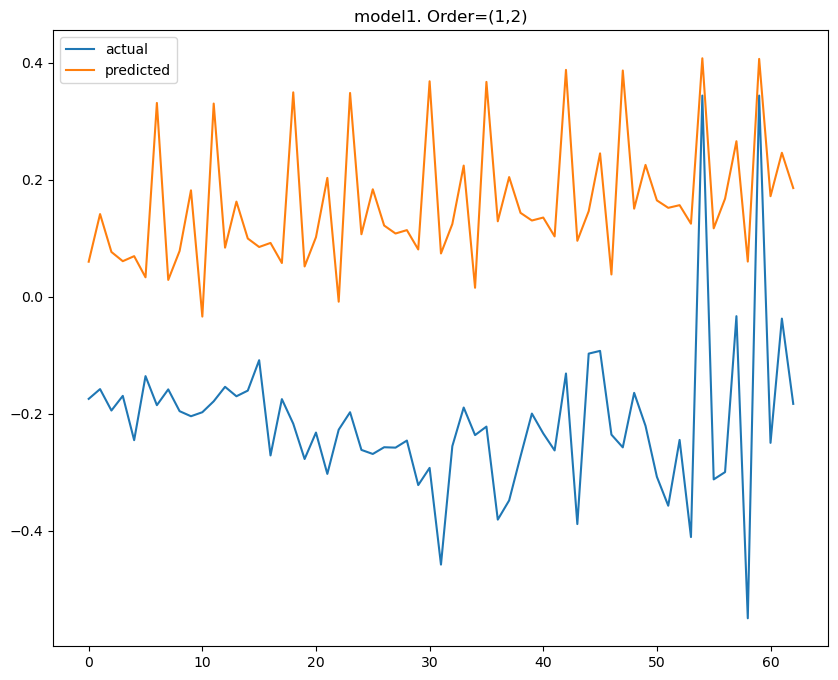

In [149]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

### forecast into the future

In [150]:
# forecast into the future
p=1; q=1; d=1
m2 = sm.tsa.statespace.SARIMAX(neg_df1['polarity_score'],order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
fcast = m2.predict(start=len(neg_df1), end=len(neg_df1)+35, typ='levels').rename('Forecast trend')
print(fcast)

2018-04-30   -0.082240
2018-05-31   -0.113650
2018-06-30   -0.121717
2018-07-31   -0.094067
2018-08-31   -0.230176
2018-09-30   -0.076404
2018-10-31   -0.173358
2018-11-30   -0.121229
2018-12-31   -0.115711
2019-01-31   -0.167033
2019-02-28   -0.167432
2019-03-31   -0.168121
2019-04-30   -0.117624
2019-05-31   -0.130056
2019-06-30   -0.149949
2019-07-31   -0.079730
2019-08-31   -0.245970
2019-09-30   -0.100284
2019-10-31   -0.176319
2019-11-30   -0.156928
2019-12-31   -0.100270
2020-01-31   -0.182827
2020-02-29   -0.170971
2020-03-31   -0.180015
2020-04-30   -0.126606
2020-05-31   -0.140131
2020-06-30   -0.159342
2020-07-31   -0.091574
2020-08-31   -0.256079
2020-09-30   -0.109928
2020-10-31   -0.187167
2020-11-30   -0.165892
2020-12-31   -0.112178
2021-01-31   -0.192937
2021-02-28   -0.181786
2021-03-31   -0.190349
Freq: M, Name: Forecast trend, dtype: float64


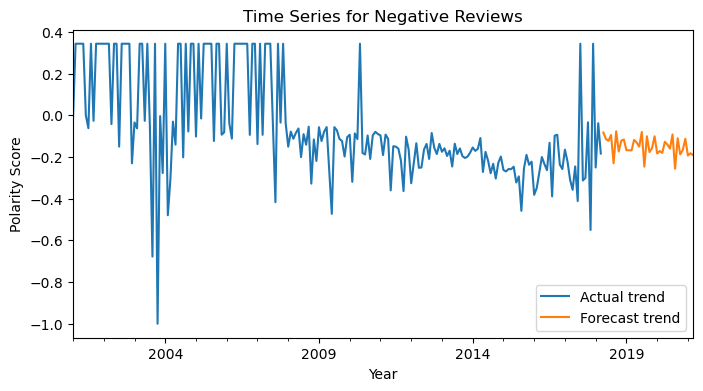

In [151]:
neg_df1['polarity_score'].rename('Actual trend').plot(figsize =(8,4), legend = True)
plt.title('Time Series for Negative Reviews',fontsize=12)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Polarity Score',fontsize=10)
fcast.plot(legend = True)
plt.show()

### Interpretation:
* **The SARIMA model for digital music shows that negative reviews trend to go down from 2018-2021.**

### Conclusion:

* **Sentiment analysis for both the products shows that majority of customers have positive reviews.**

* **Through visualization we observed that maximum percentage of reviews are in positive, and ratings are 5 stars.**

* **In classification model, Logistic regression model with one vs rest strategy seems to be good to predict the customer sentiments in future.**

* **Cluster analysis shows that there are three types of customers- satisfied, dissatisfied and happy customers.Customers with postive and neutral sentiments tend to give high ratings**

* **Time series model for both the products shows that positive reviews tends to go up and negative reviews tends to go down.**


# Recommendation:

* **Improve product descriptions: Several reviews mentioned that the product descriptions for musical instruments were not detailed enough. This can lead to confusion for customers and may result in more returns.**

* **Focus on quality control: Many negative reviews for both digital music and musical instruments mentioned issues with quality control. Products arrived damaged, or with missing parts, which can result in poor customer satisfaction and lead to negative reviews.** 

* **Offer better customer service: Some reviews mentioned poor customer service experiences, including difficulties with returns and lack of response from customer service.** 

* **Address technical issues: Several reviews for digital music products mentioned technical issues, such as difficulty with downloading or using the cable. Addressing these technical issues can improve the customer experience and lead to more positive reviews.**
